# 2.3. Position-based visual servoing
*Vicent Santamarta Martinez*

In [2]:
# @title Imports
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(linewidth=120, formatter={'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})

In [3]:
np.random.seed(0)

In [4]:
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
camera = CentralCamera.Default(pose=SE3.Trans(1, 1, -2));

In [6]:
P = mkgrid(2, 0.5)

In [7]:
p = camera.project_point(P, objpose=SE3.Tz(1))
p

array([[   166.7,    166.7,      300,      300],
       [   166.7,      300,      300,    166.7]])

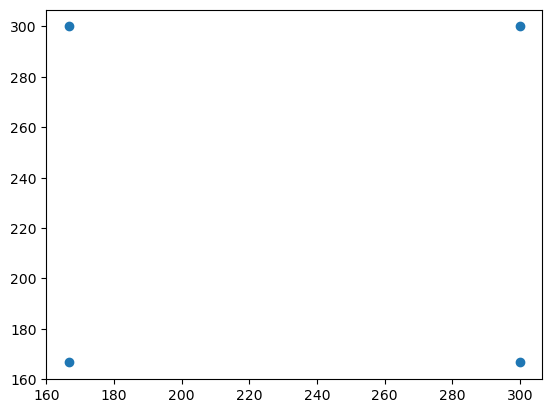

In [8]:
plt.plot(p[0,:], p[1,:], 'o')

In [9]:
Te_C_G = camera.estpose(P, p, frame="camera");
Te_C_G.printline()

t = -1, -1, 3; rpy/zyx = 0°, 0°, 0°


In [10]:
T_Cd_G = SE3.Tz(1);

In [11]:
T_delta = Te_C_G * T_Cd_G.inv();
T_delta.printline()

t = -1, -1, 2; rpy/zyx = 0°, 0°, 0°


In [12]:
camera.pose = camera.pose * T_delta.interp1(0.05);

In [13]:
camera = CentralCamera.Default(pose = SE3.Trans(1, 1, -2));

In [14]:
T_Cd_G = SE3.Tz(1)

Visual servo object: camera=default perspective camera
  100 iterations, 0 history'[[   -0.25    -0.25     0.25     0.25]
     [   -0.25     0.25     0.25    -0.25]
     [       0        0        0        0]]
cdTg: t = 0, 0, 1; rpy/yxz = 0°, 0°, 0°

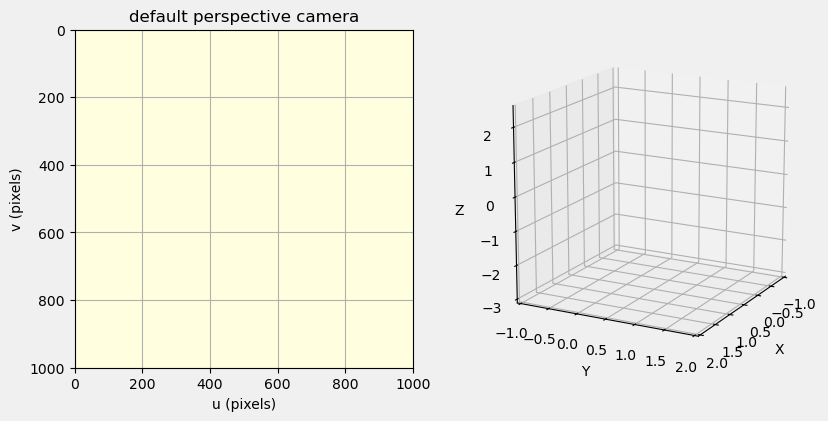

In [23]:
pbvs = PBVS(camera, P=P, pose_g=SE3.Trans(-1, -1, 2), pose_d=T_Cd_G, plotvol=[-1, 2, -1, 2, -3, 2.5]);
pbvs

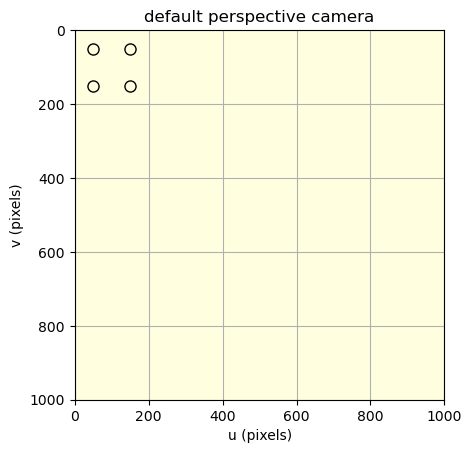

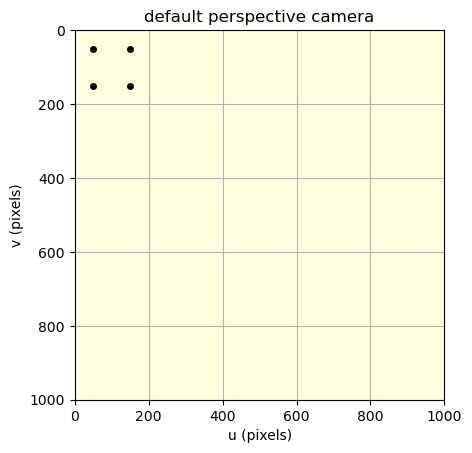

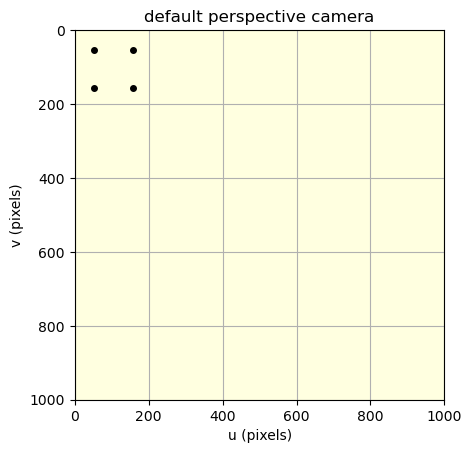

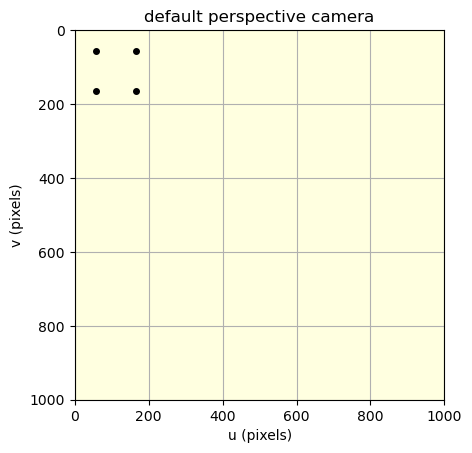

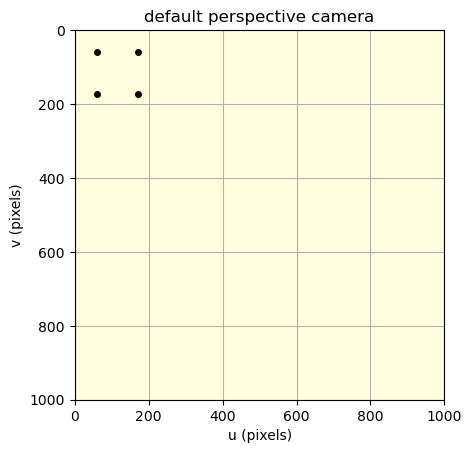

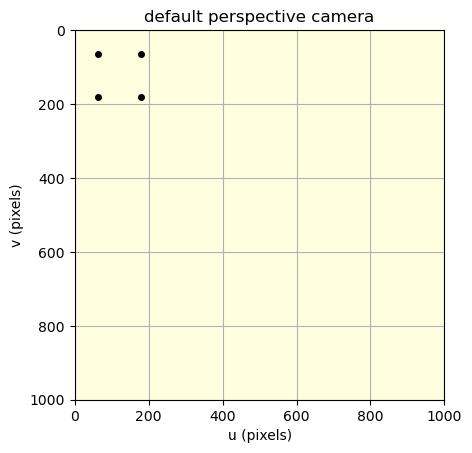

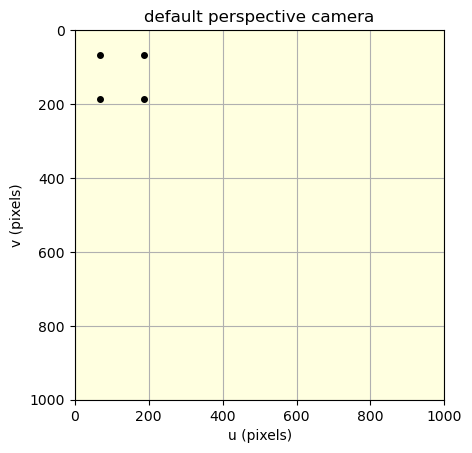

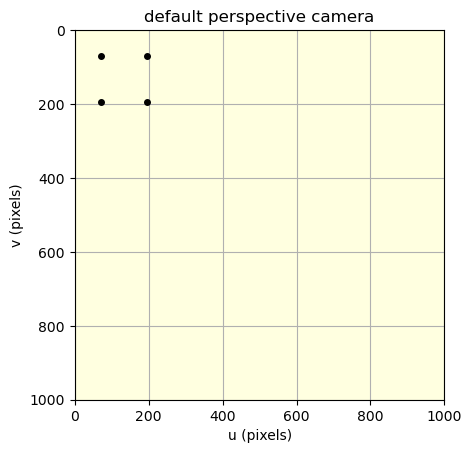

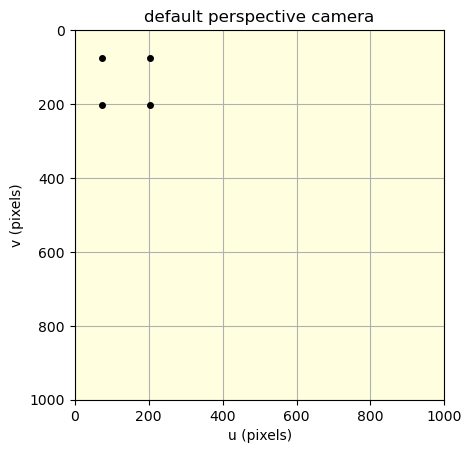

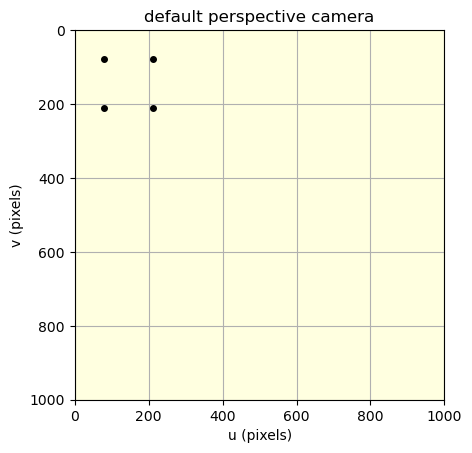

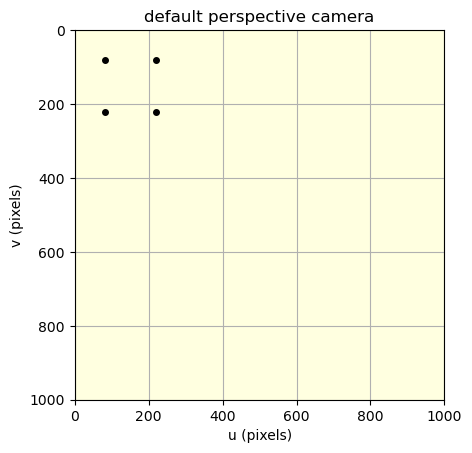

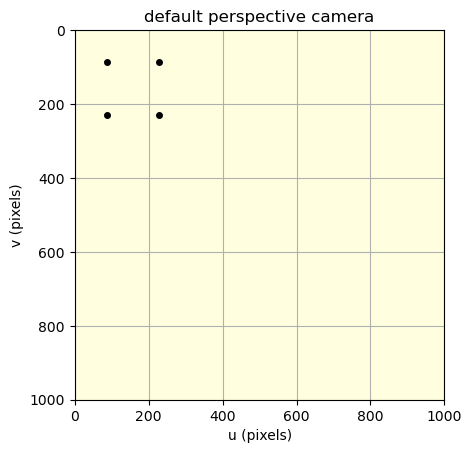

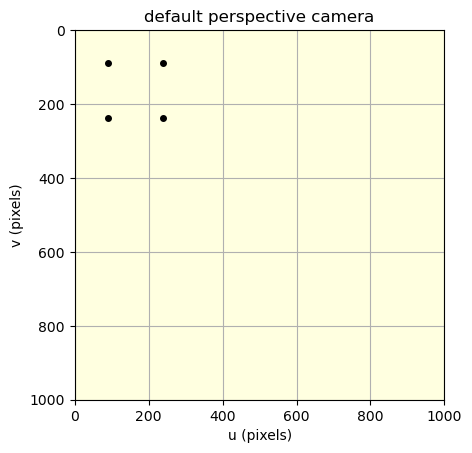

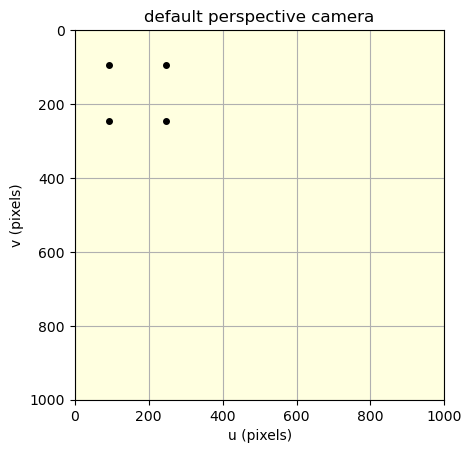

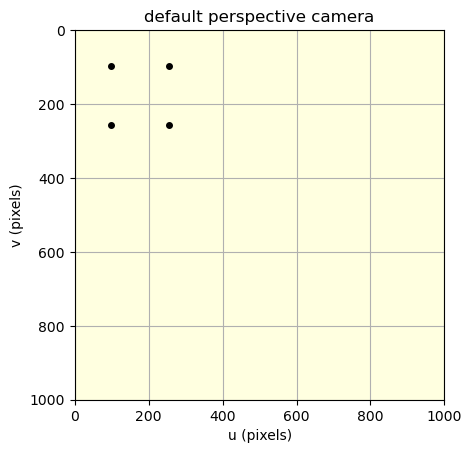

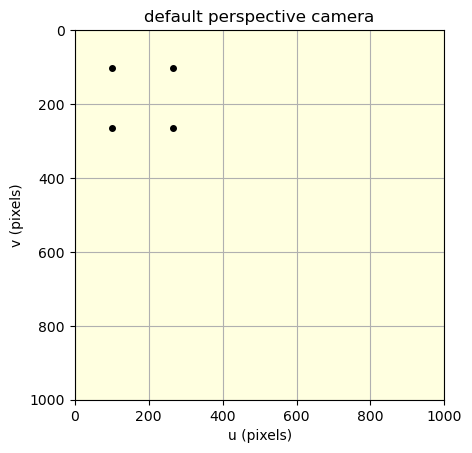

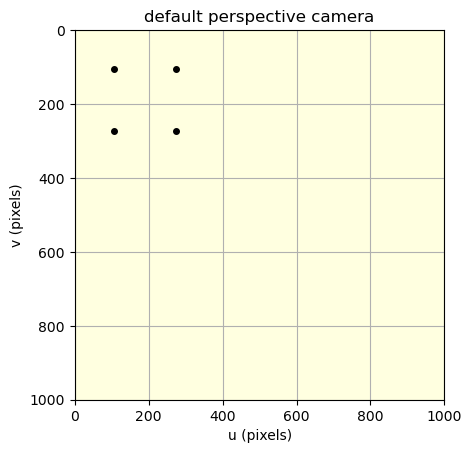

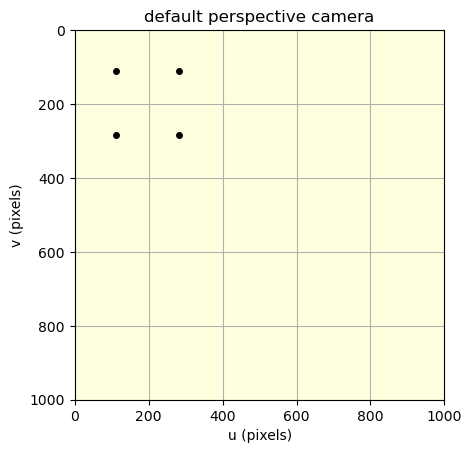

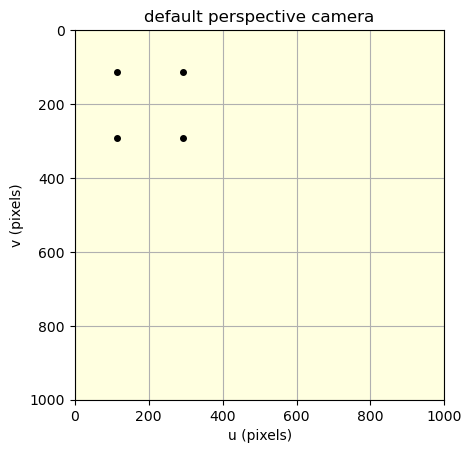

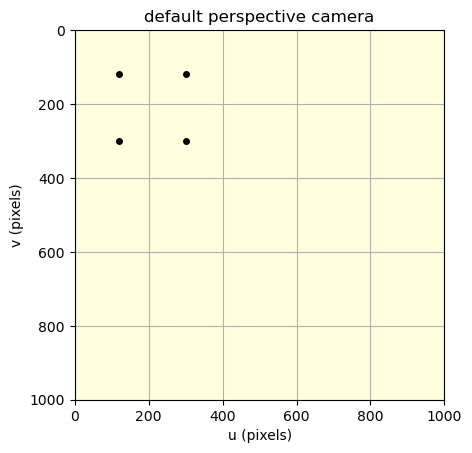

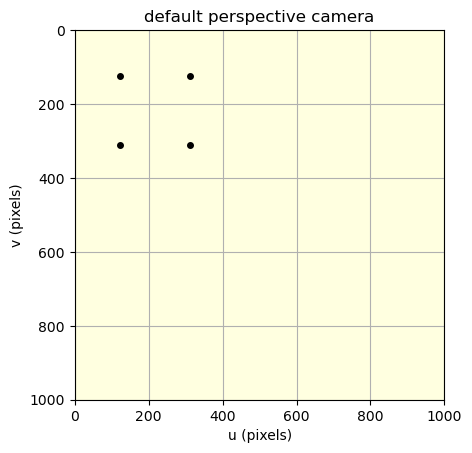

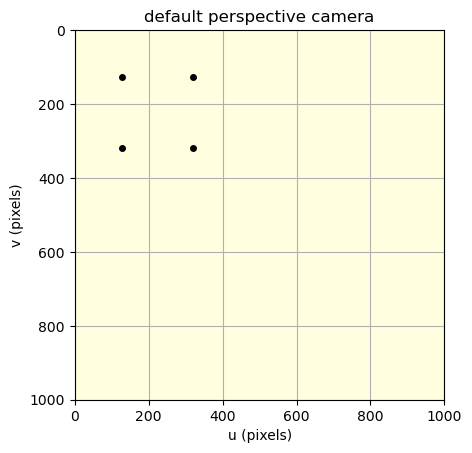

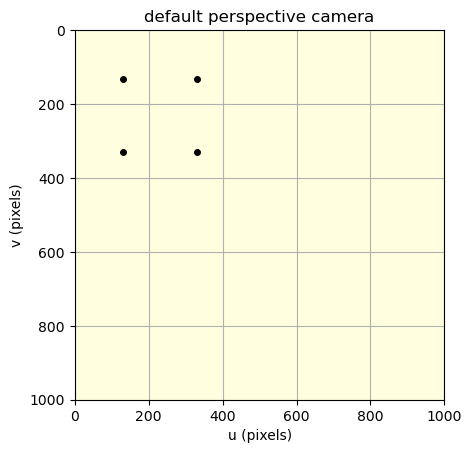

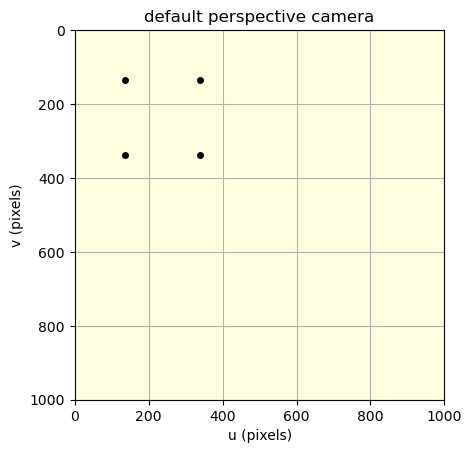

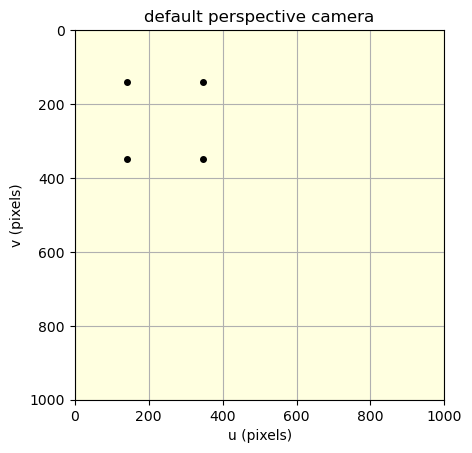

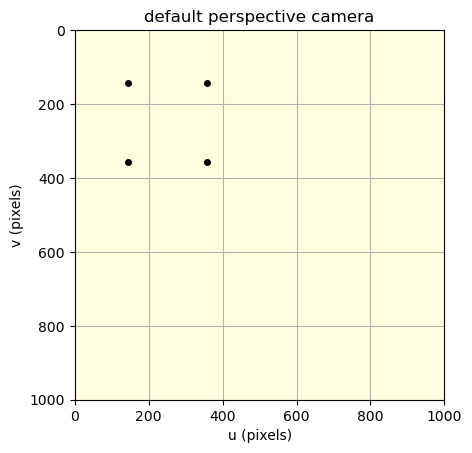

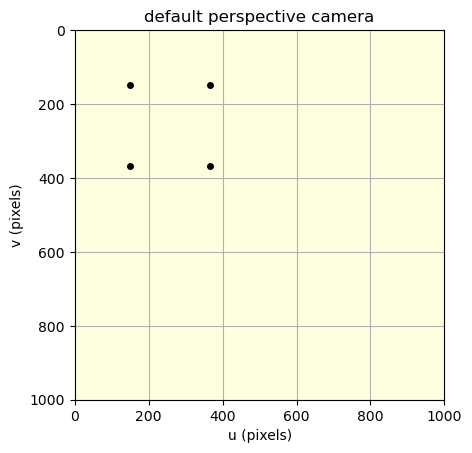

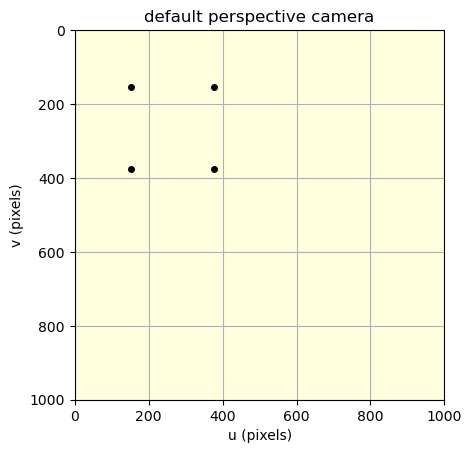

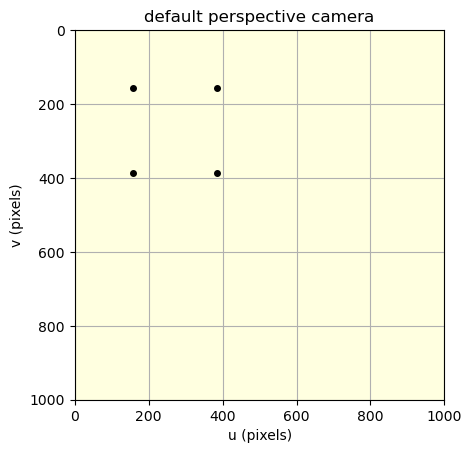

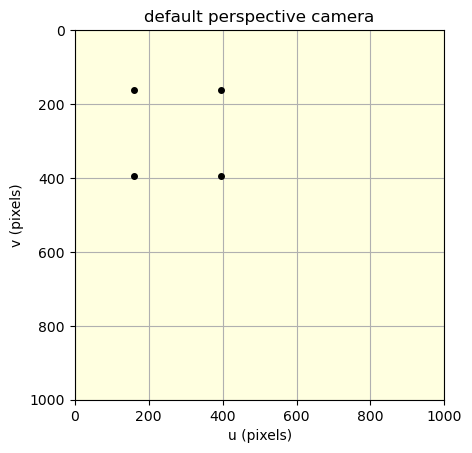

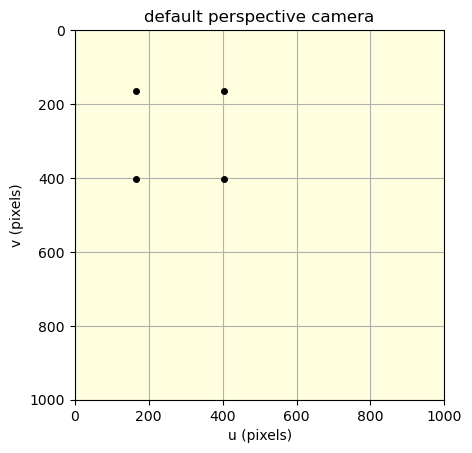

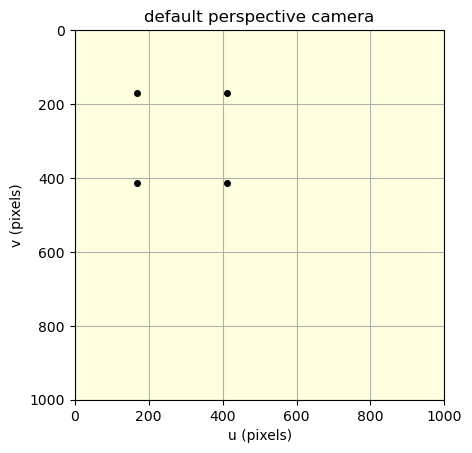

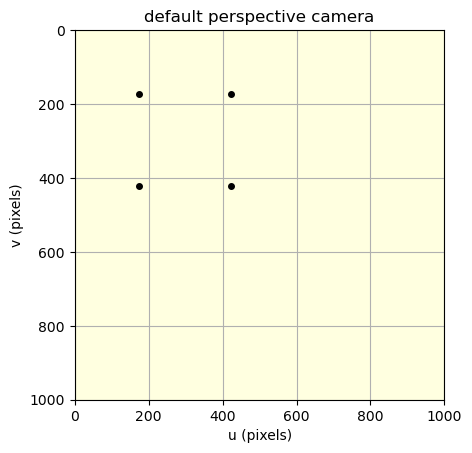

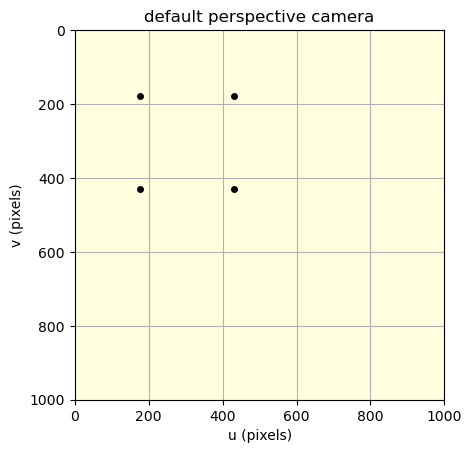

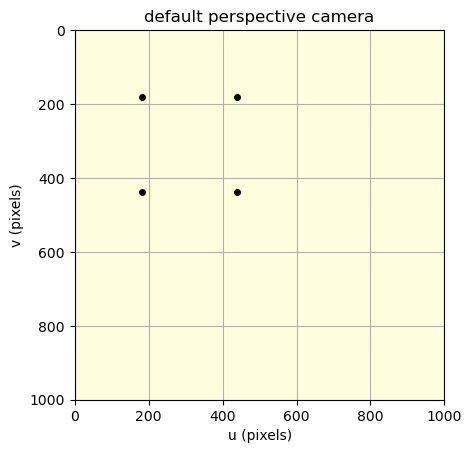

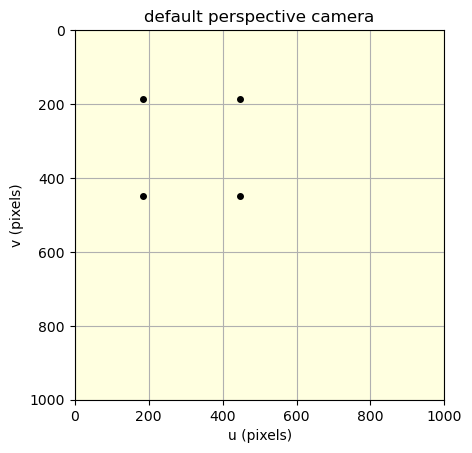

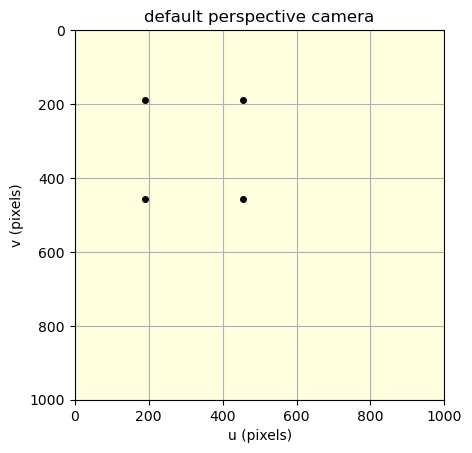

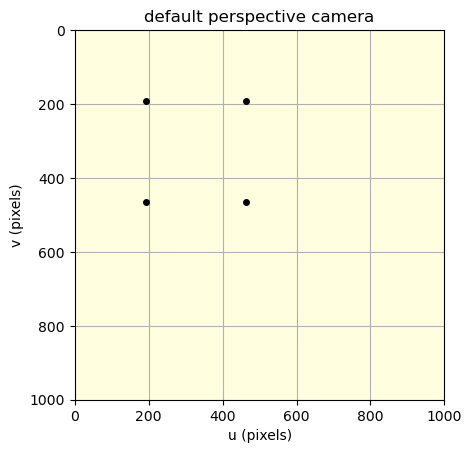

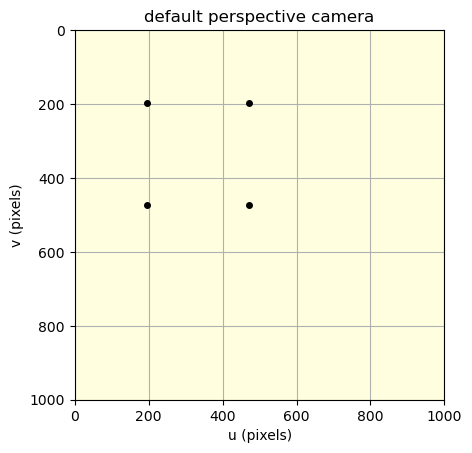

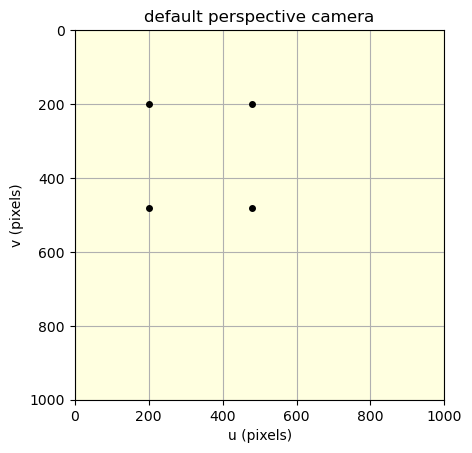

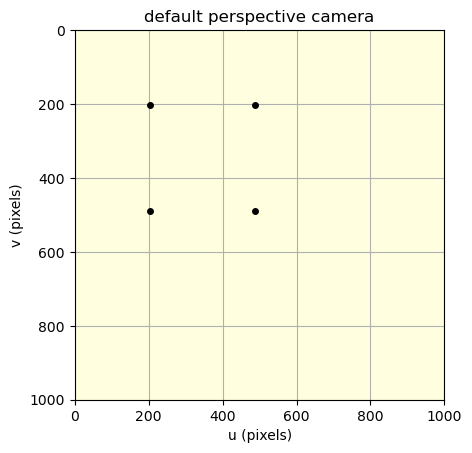

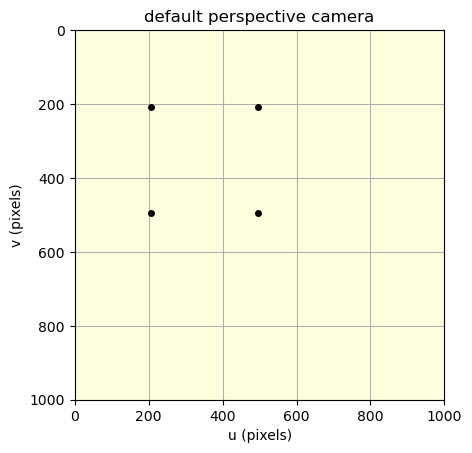

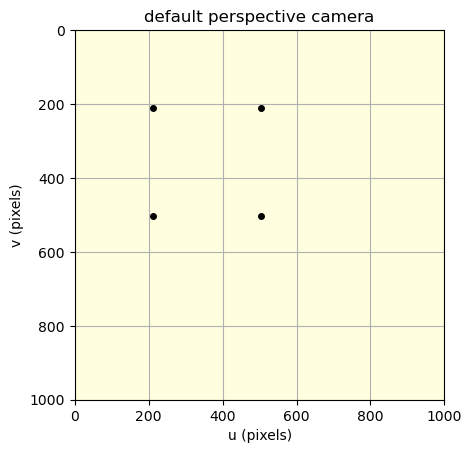

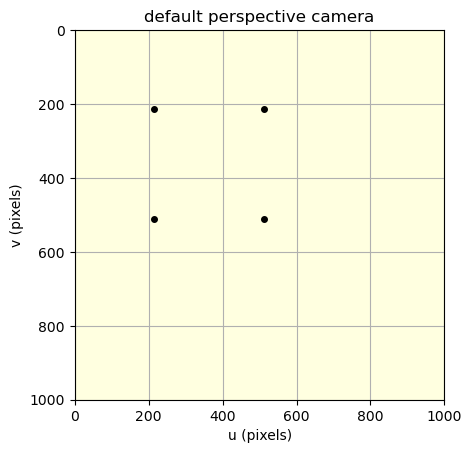

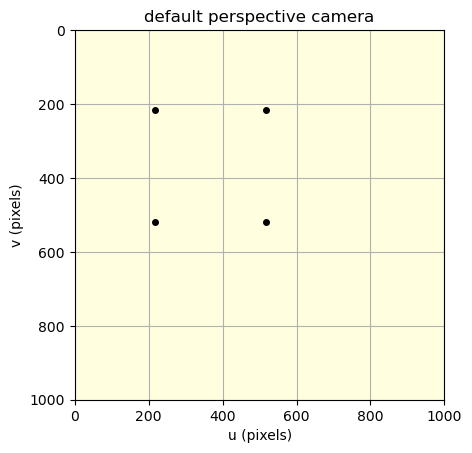

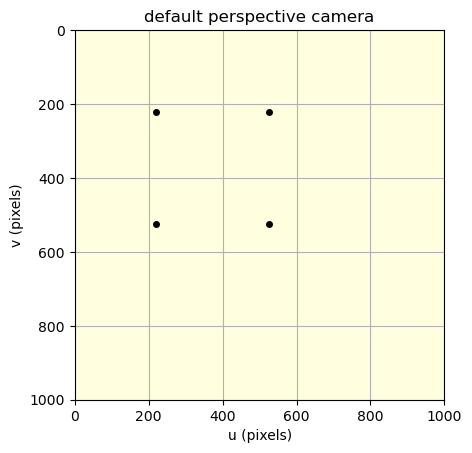

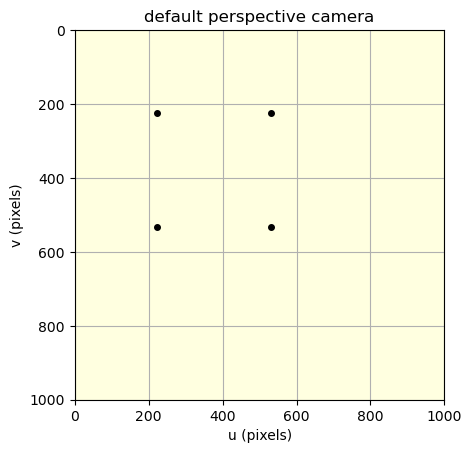

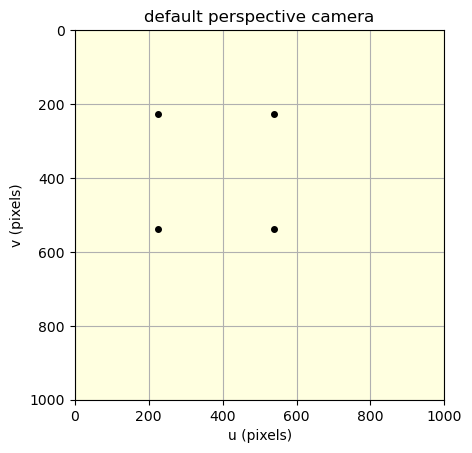

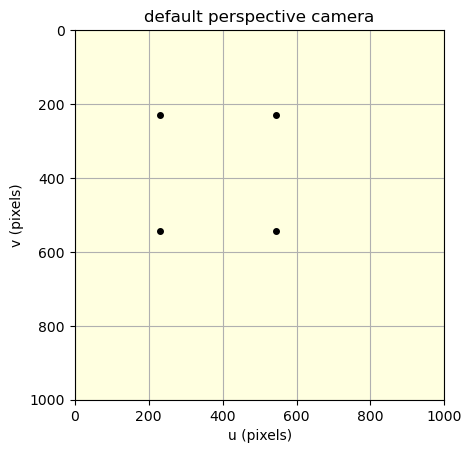

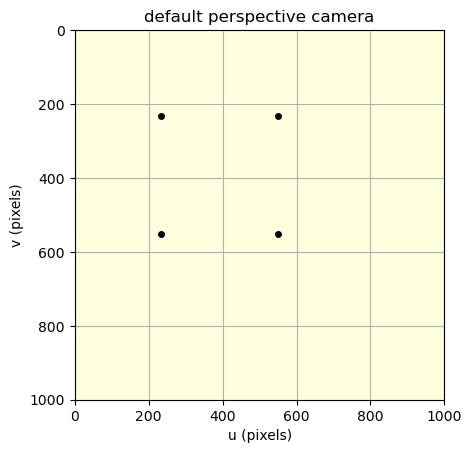

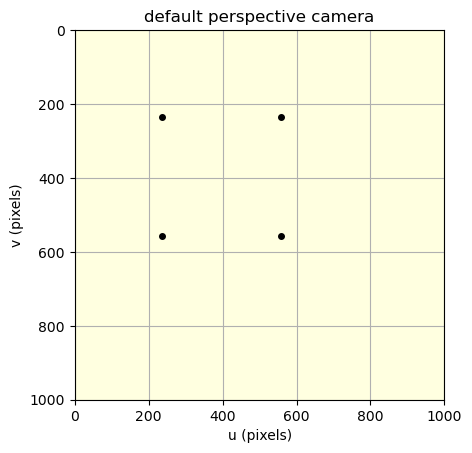

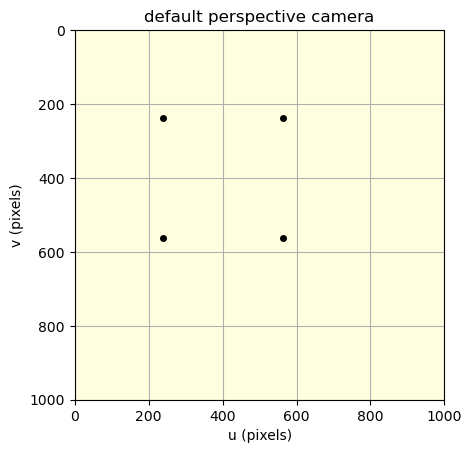

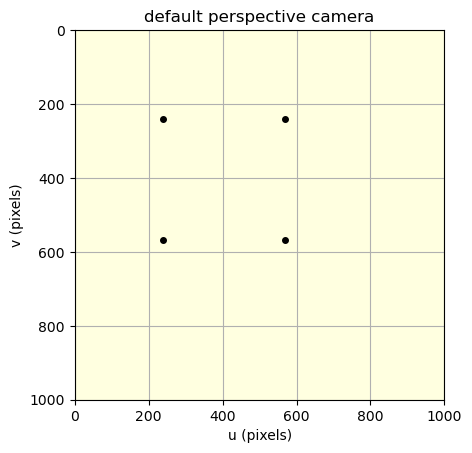

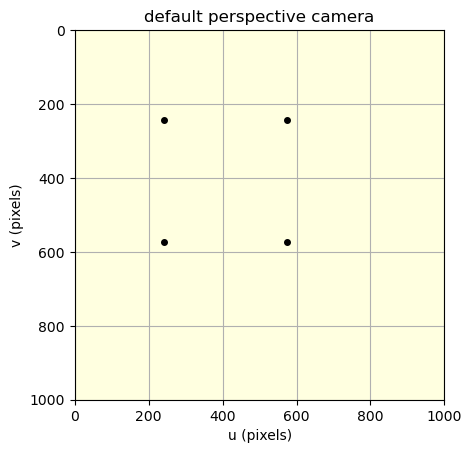

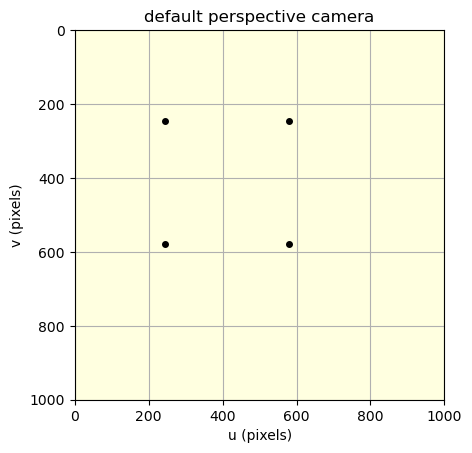

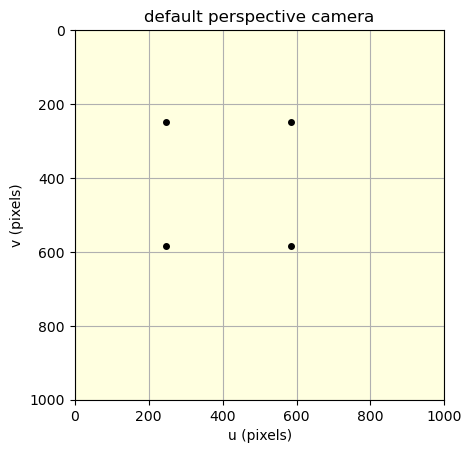

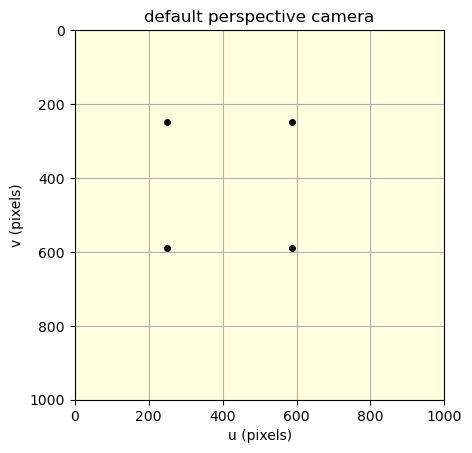

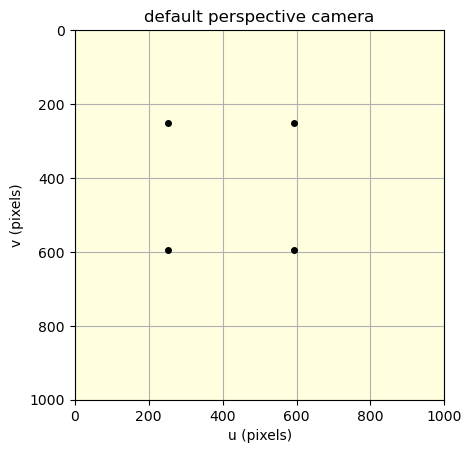

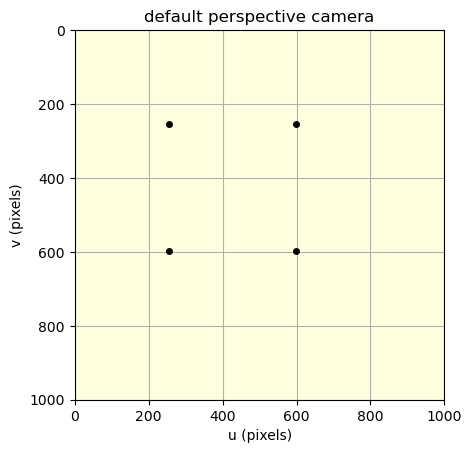

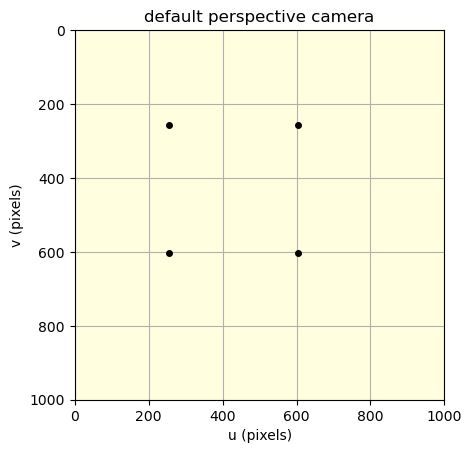

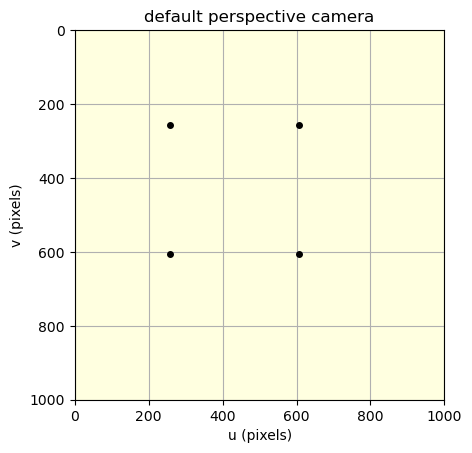

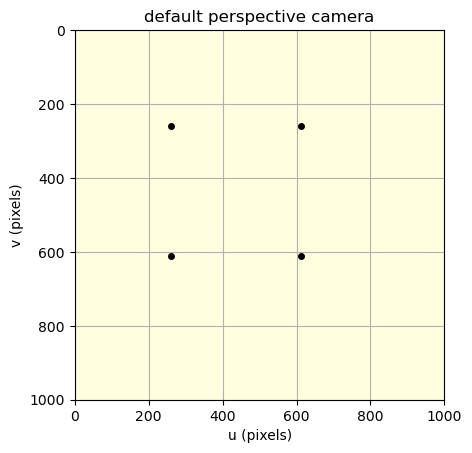

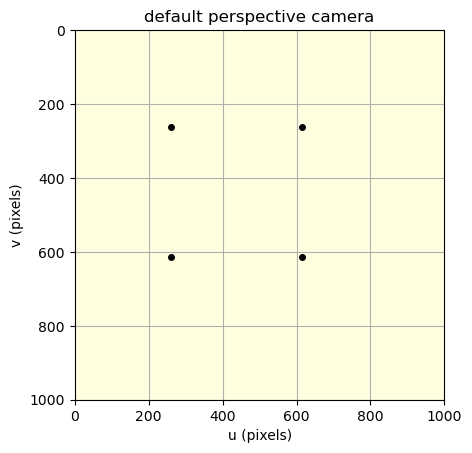

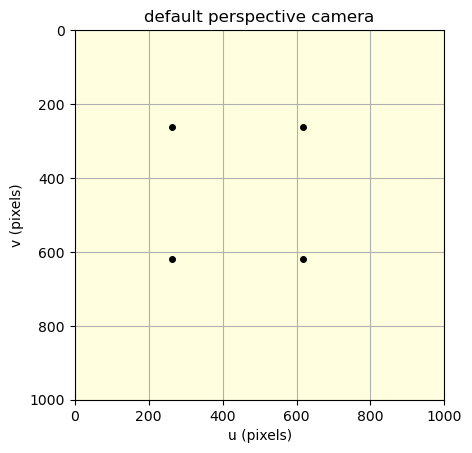

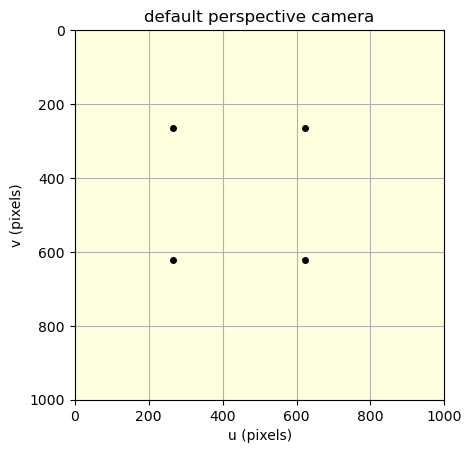

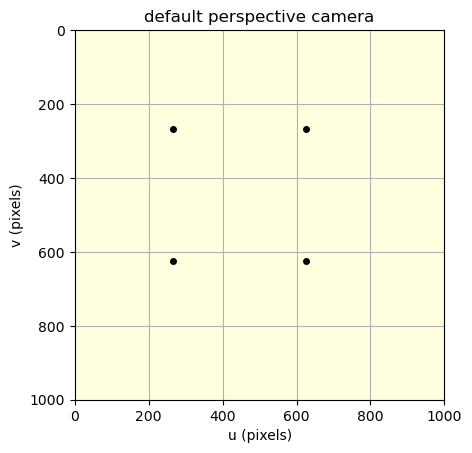

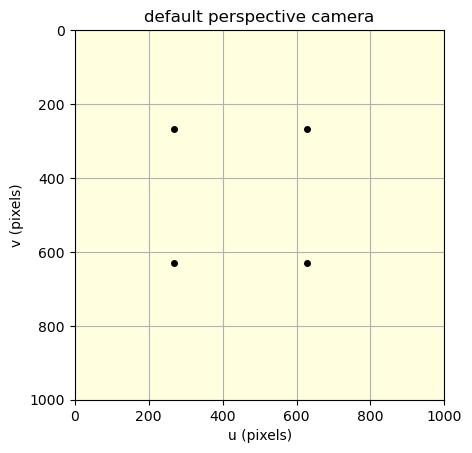

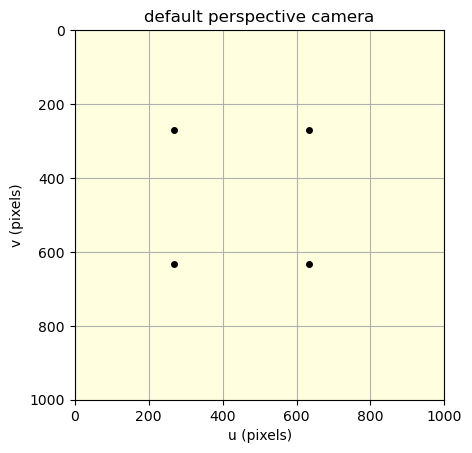

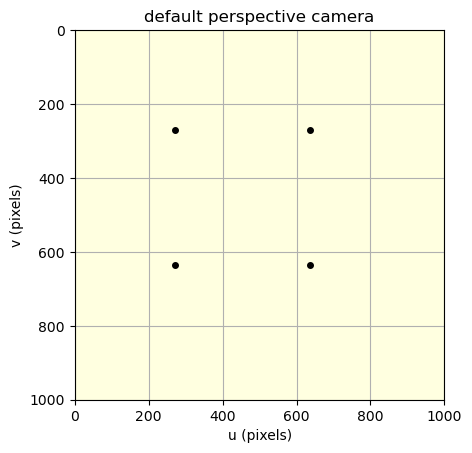

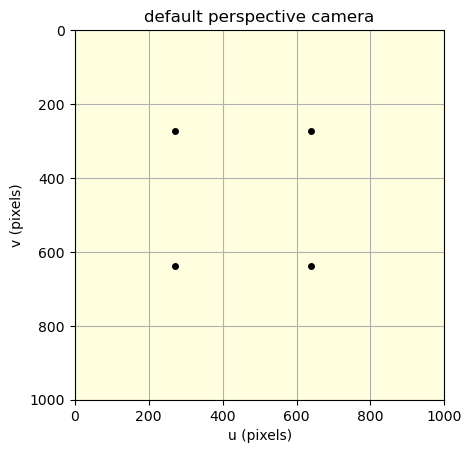

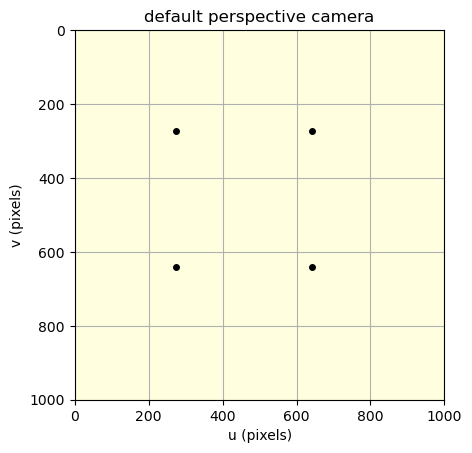

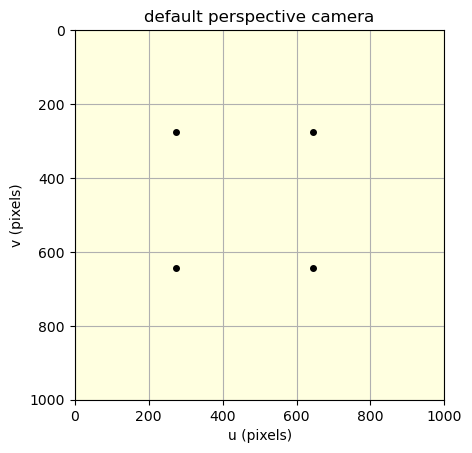

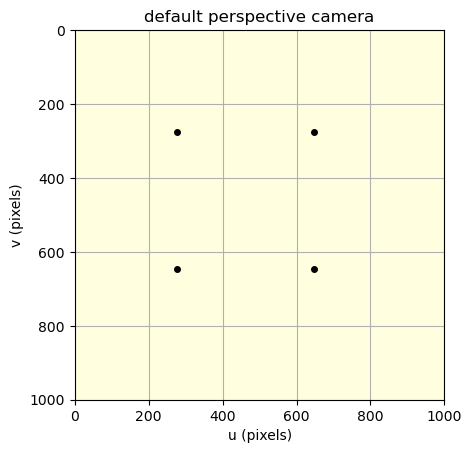

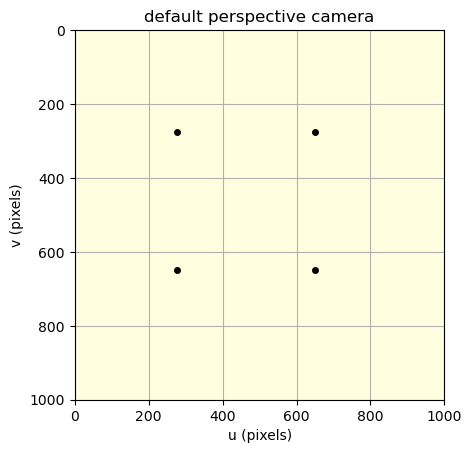

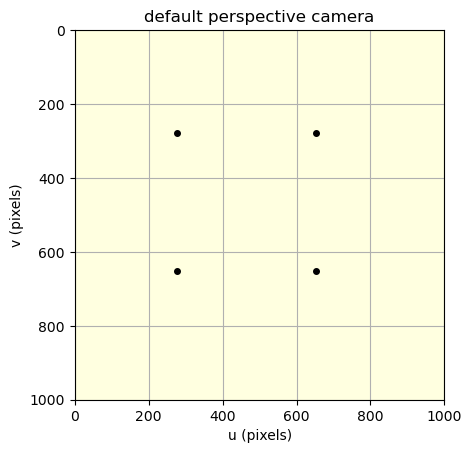

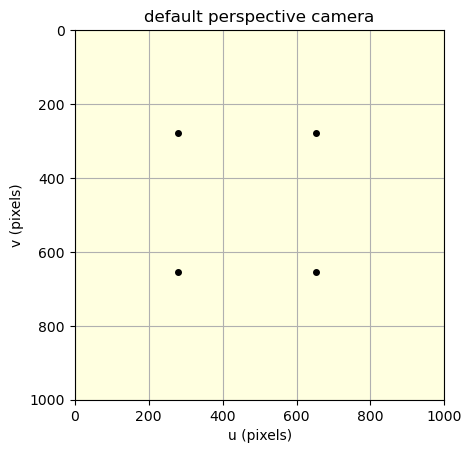

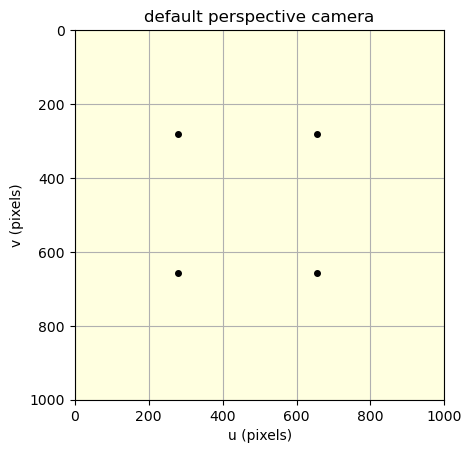

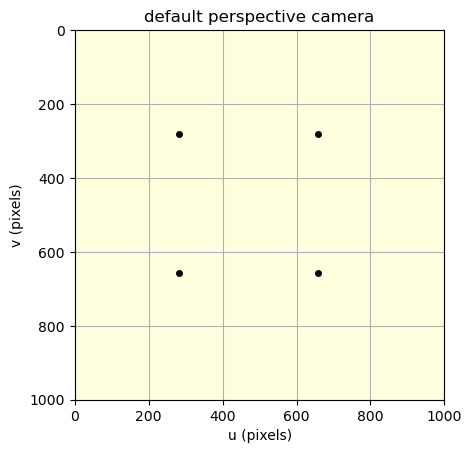

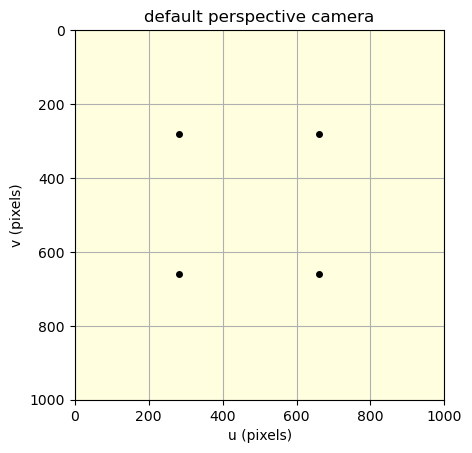

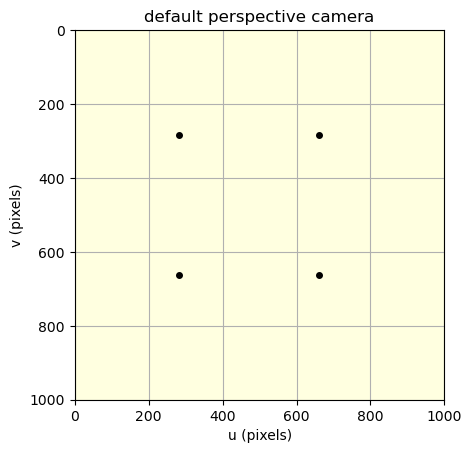

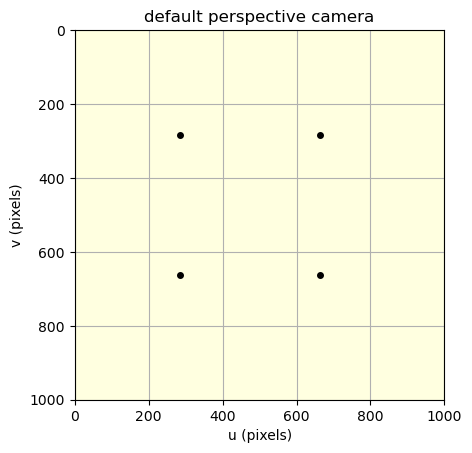

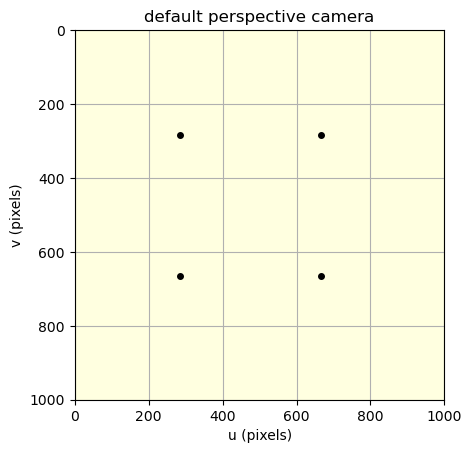

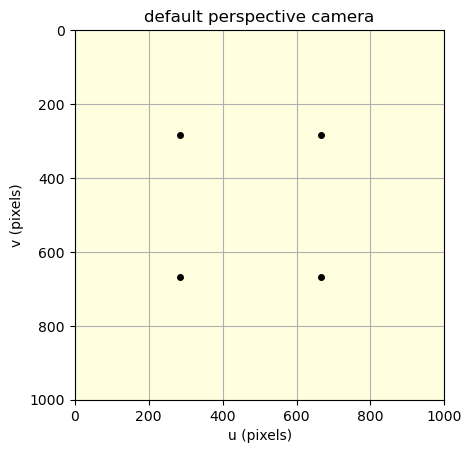

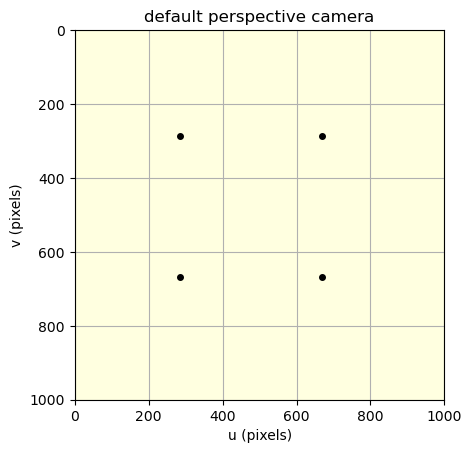

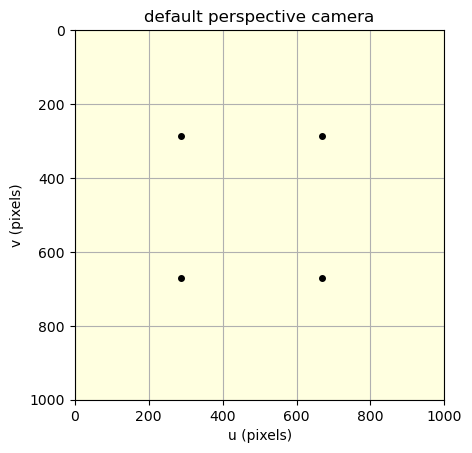

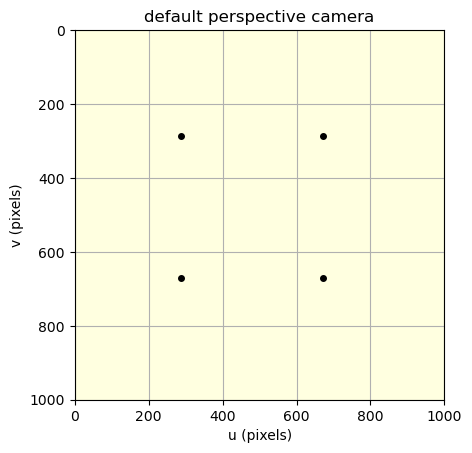

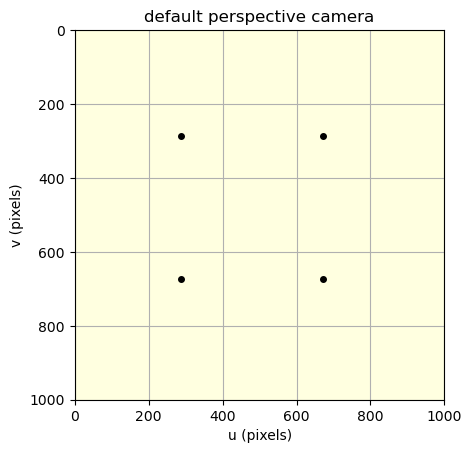

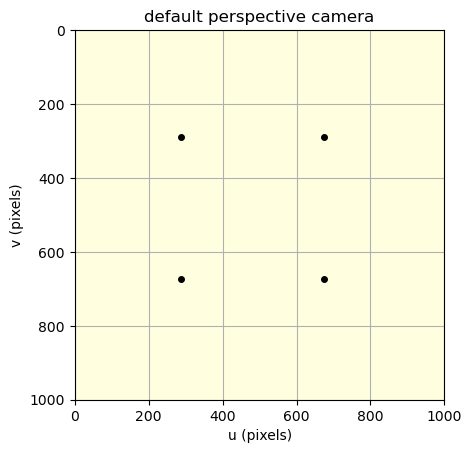

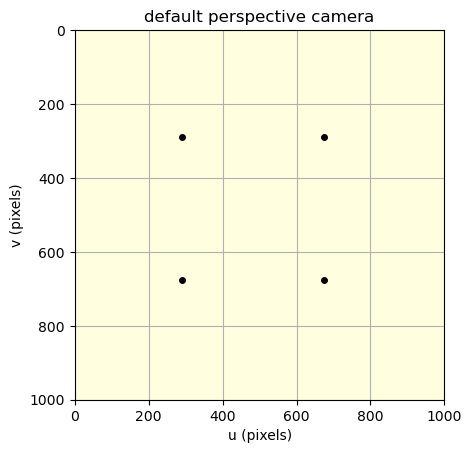

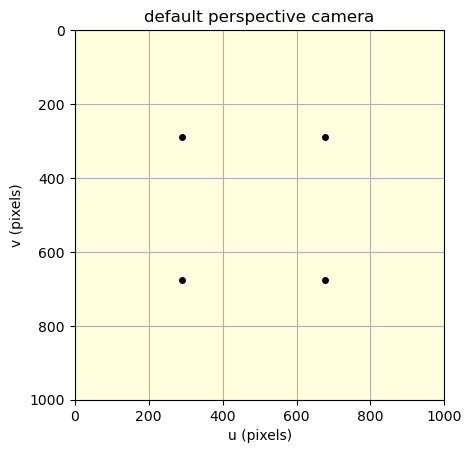

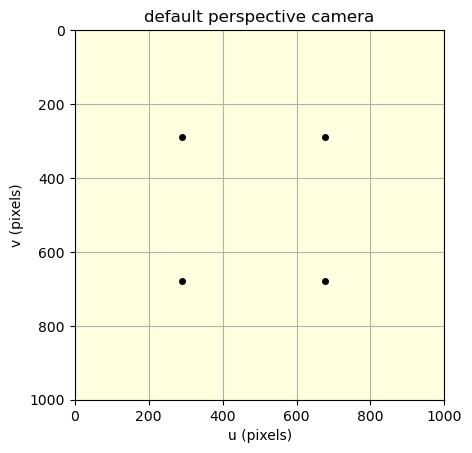

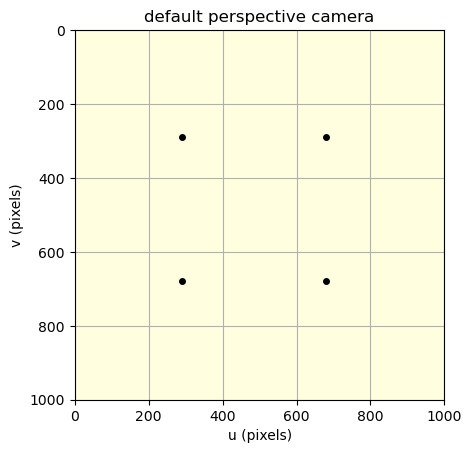

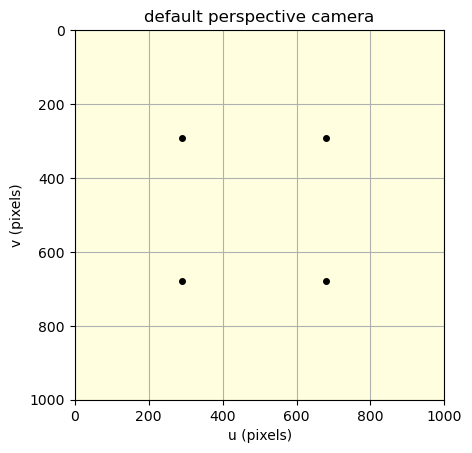

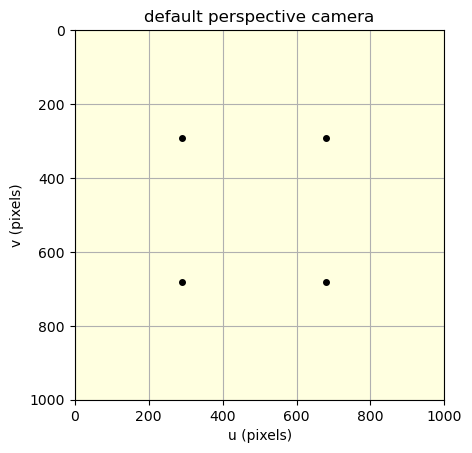

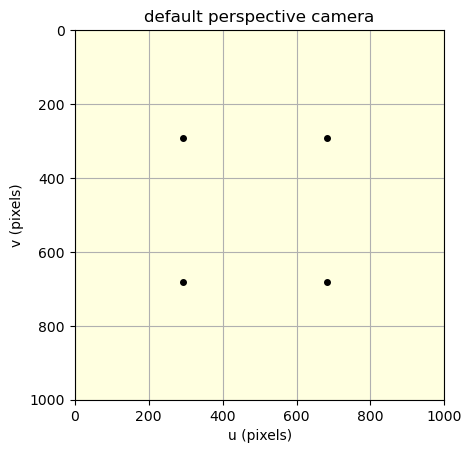

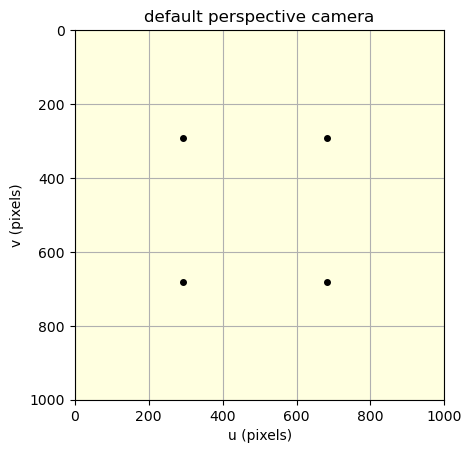

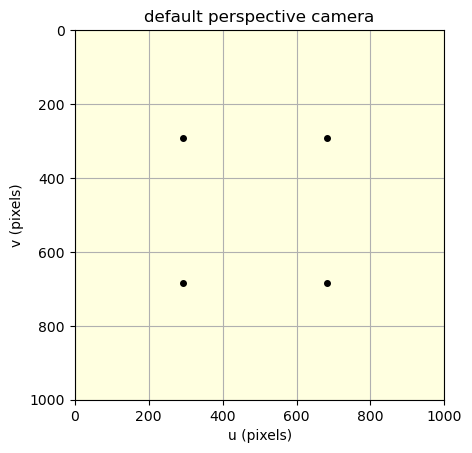

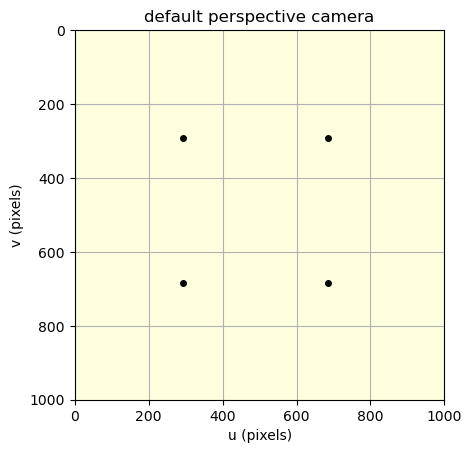

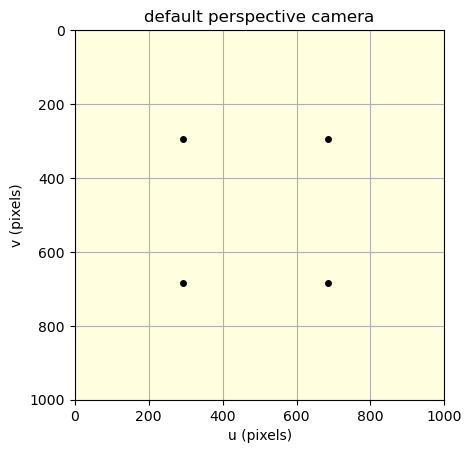

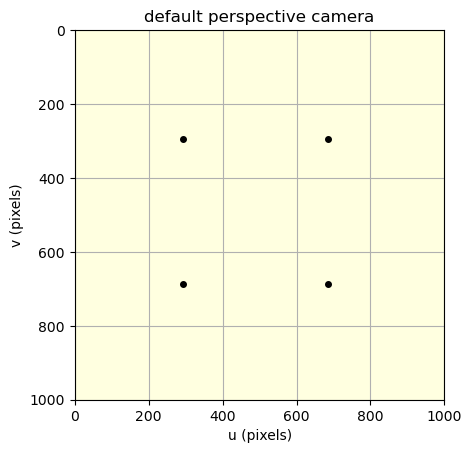

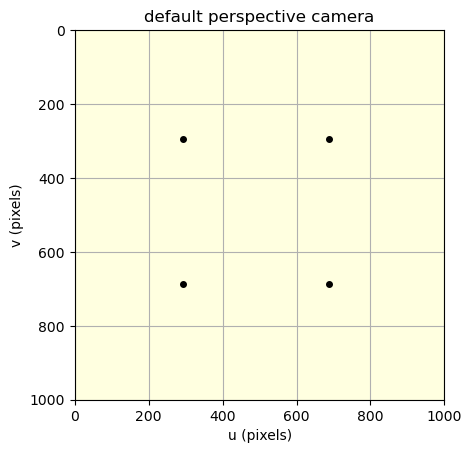

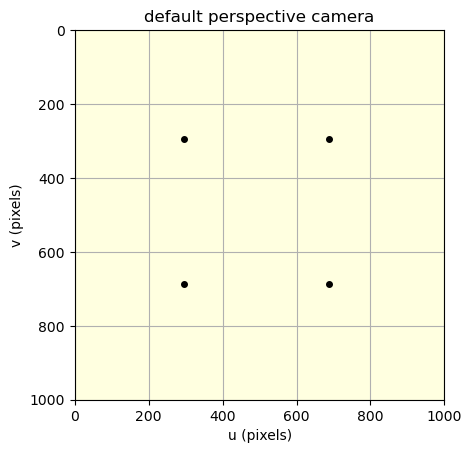

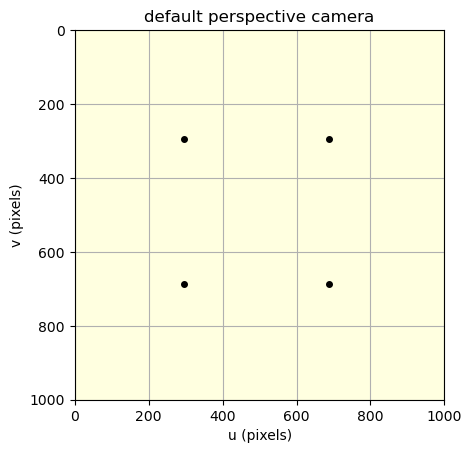

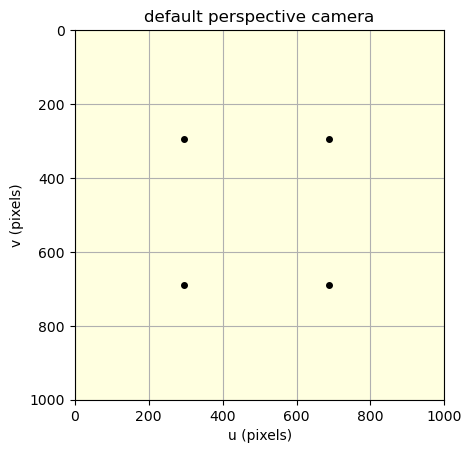

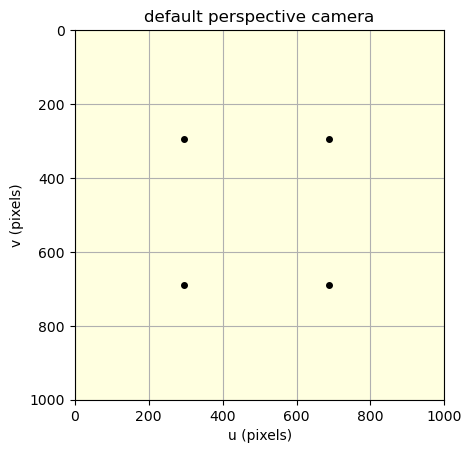

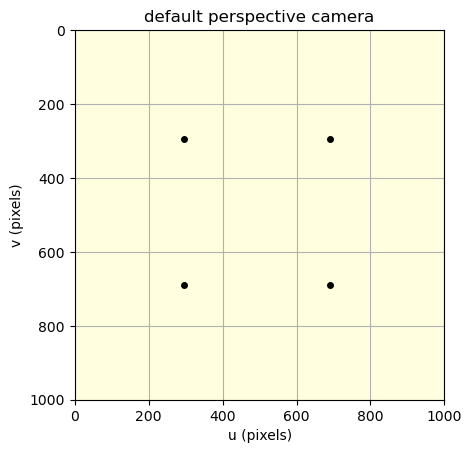

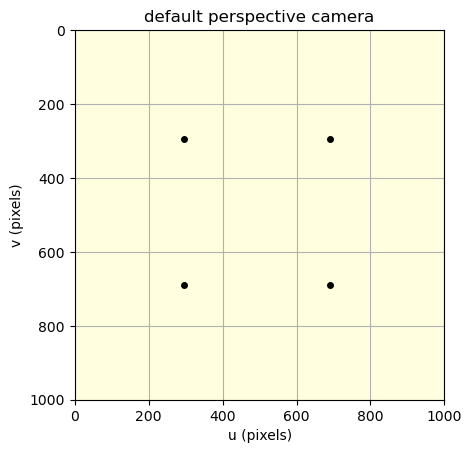

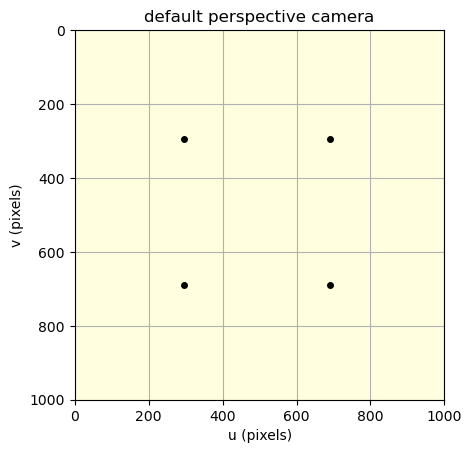

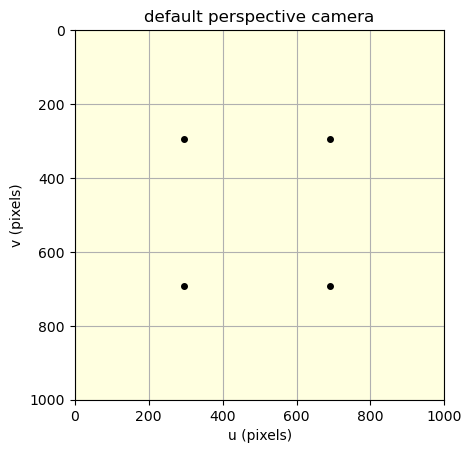

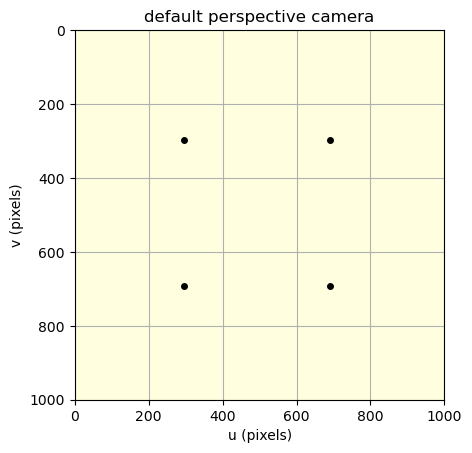

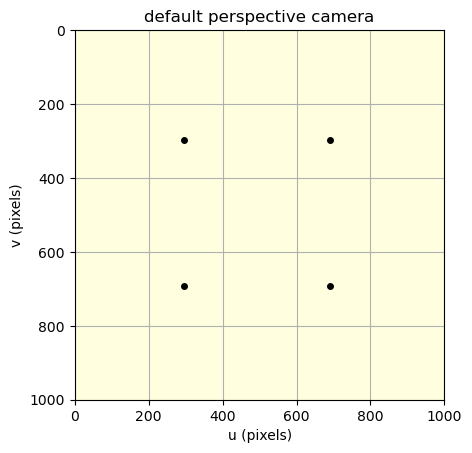

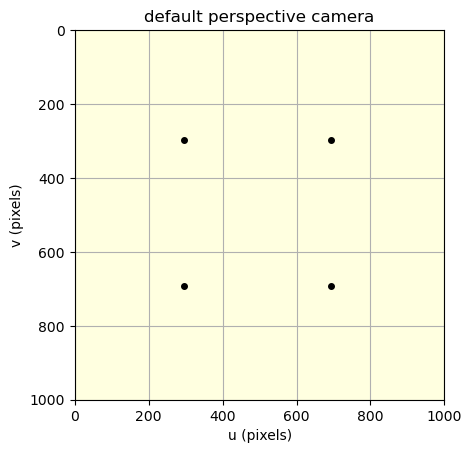

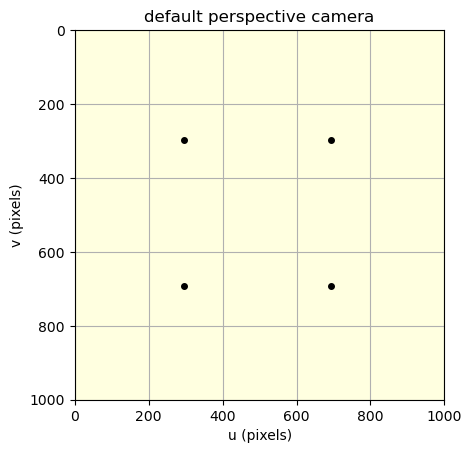

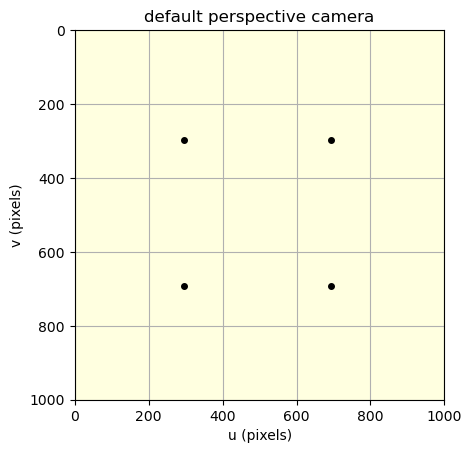

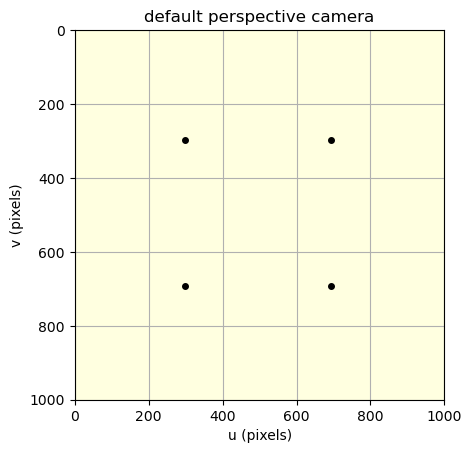

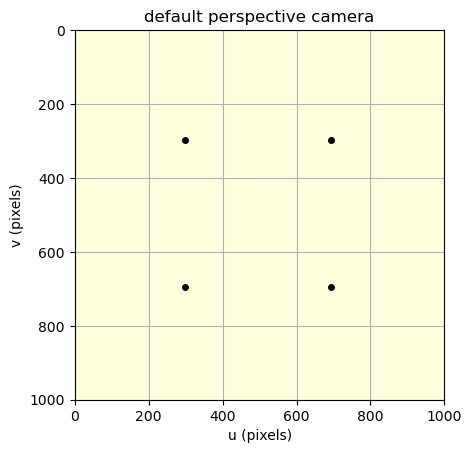

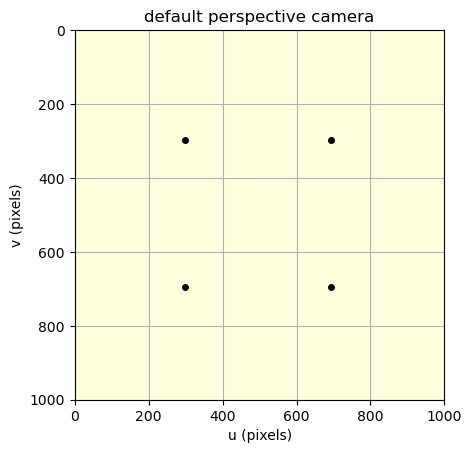

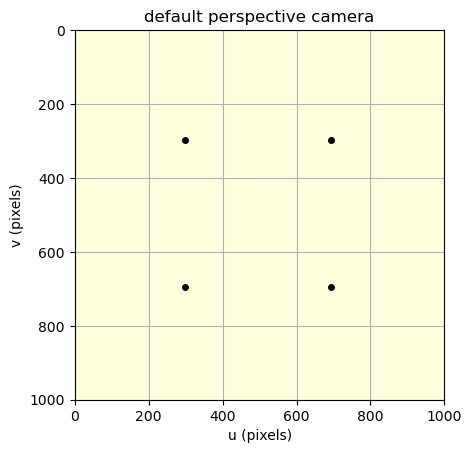

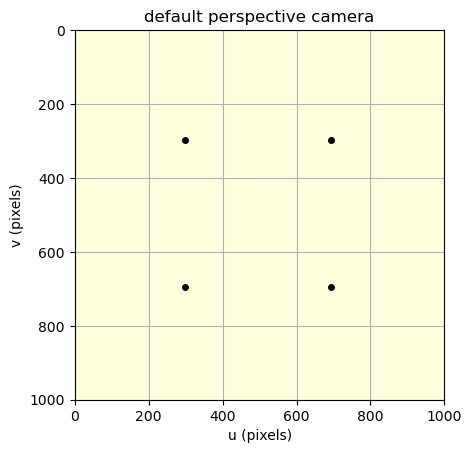

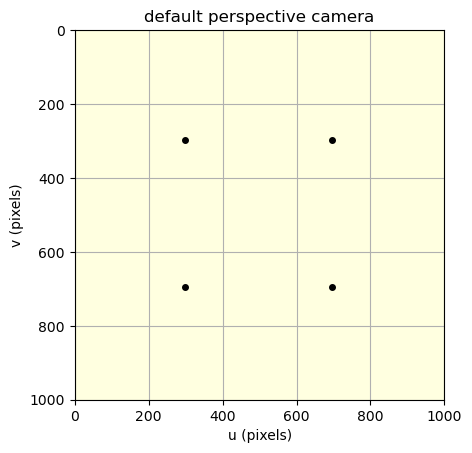

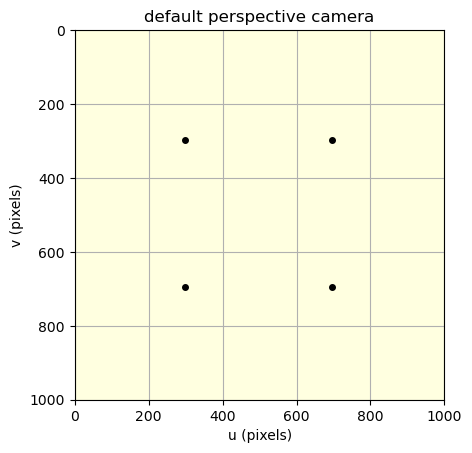

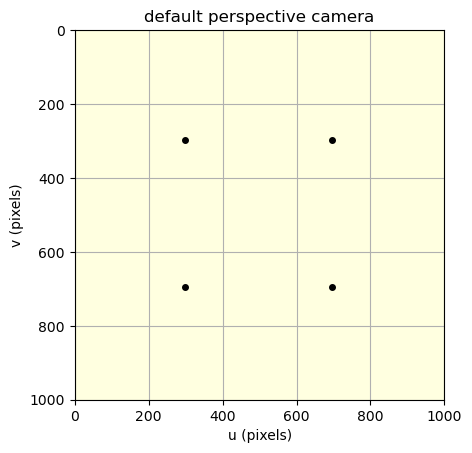

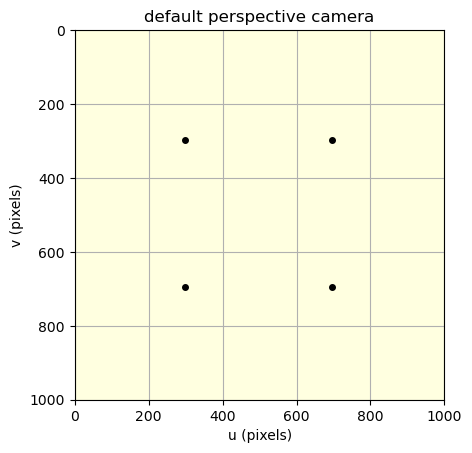

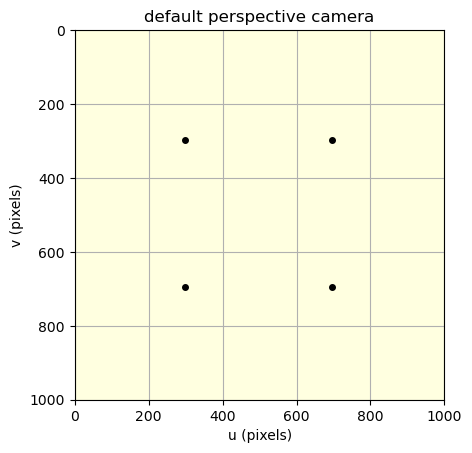

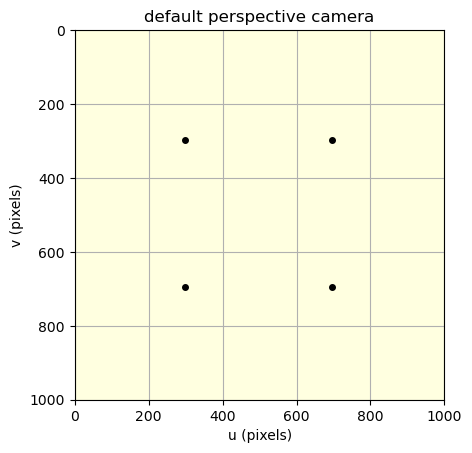

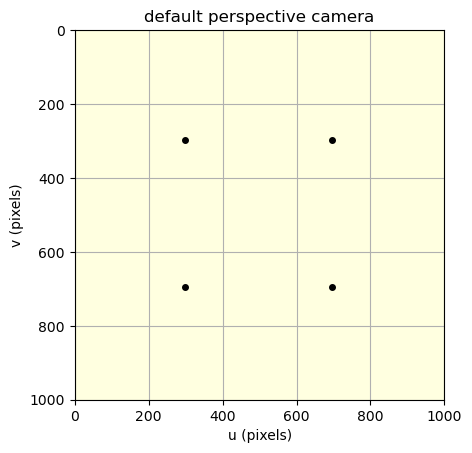

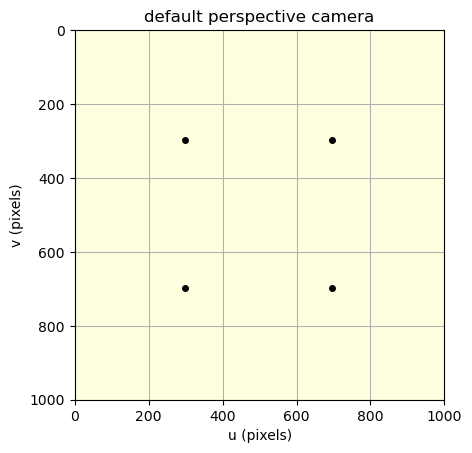

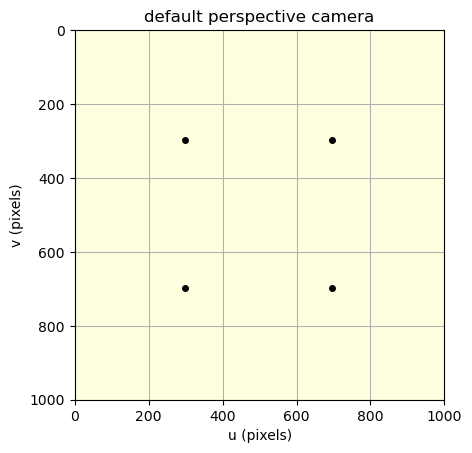

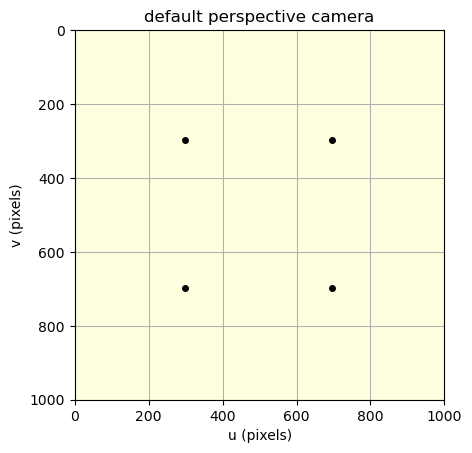

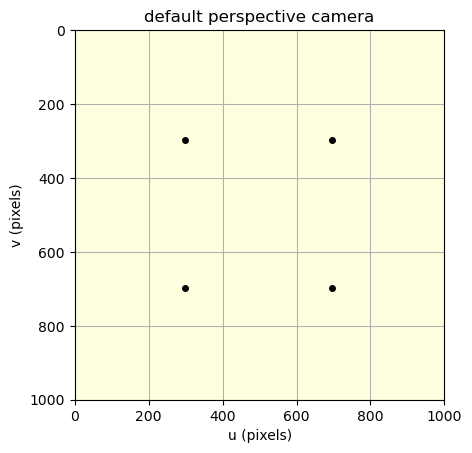

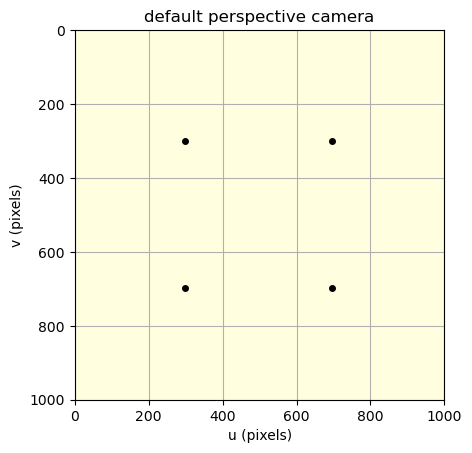

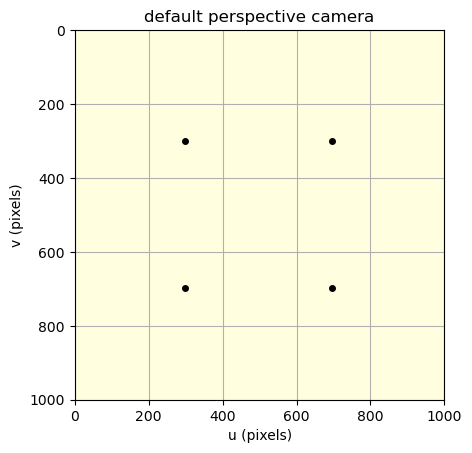

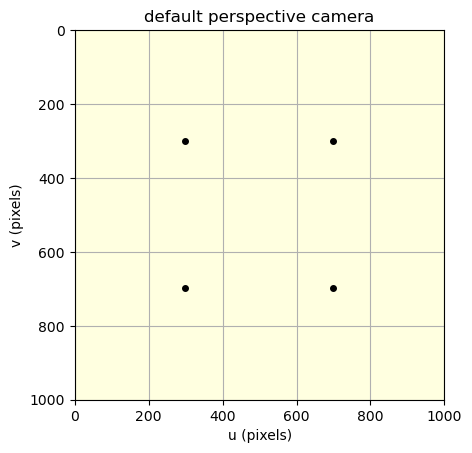

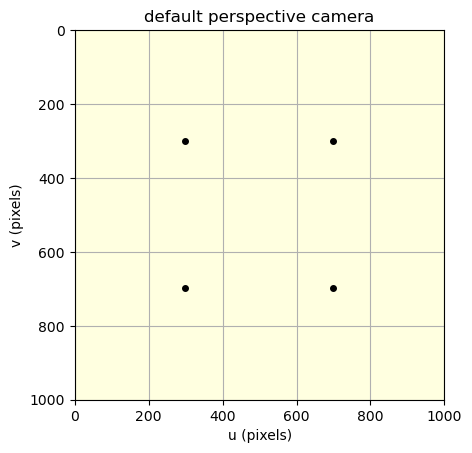

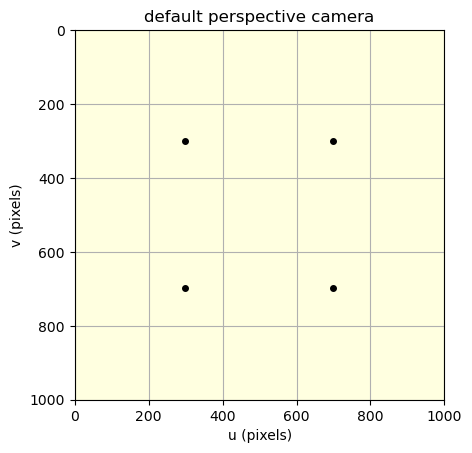

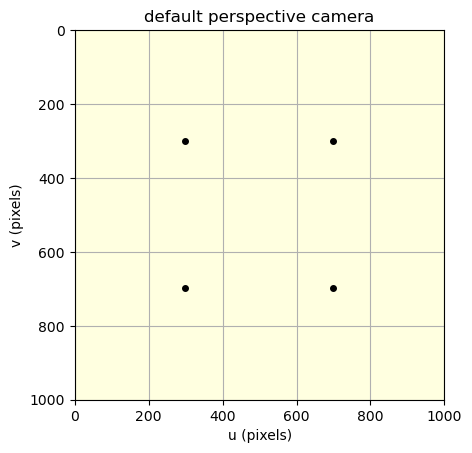

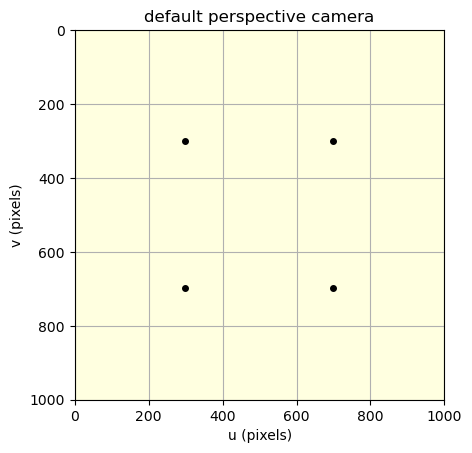

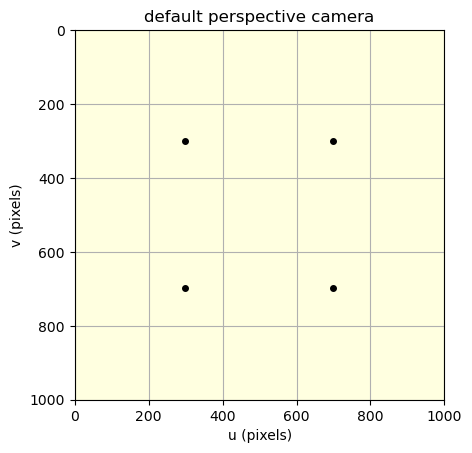

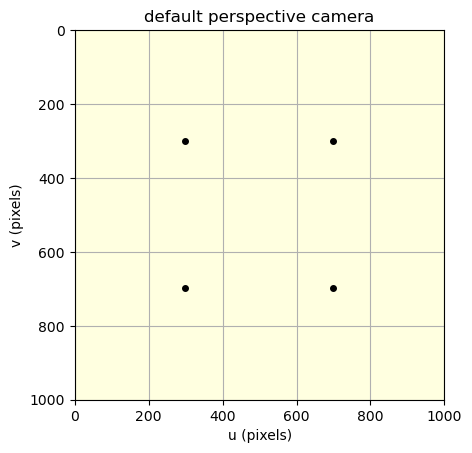

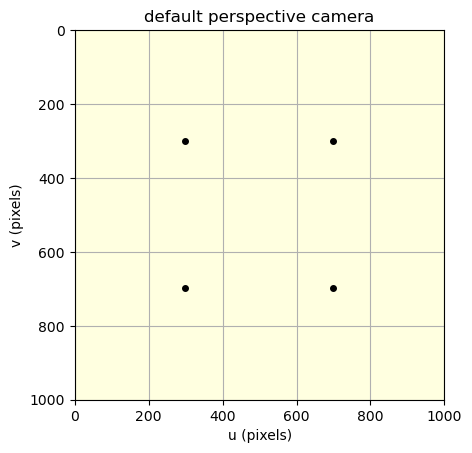

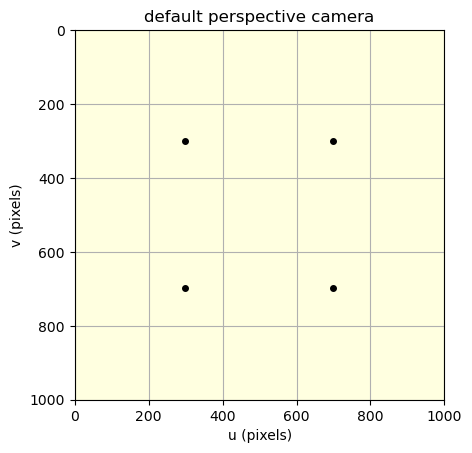

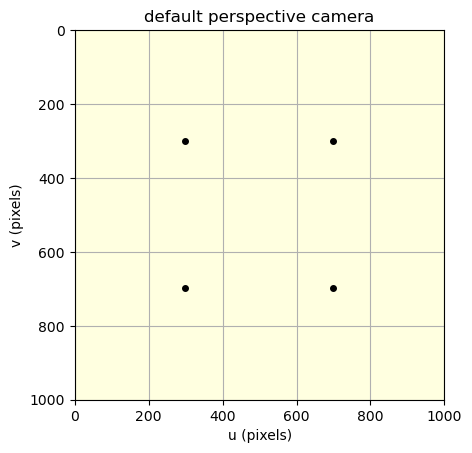

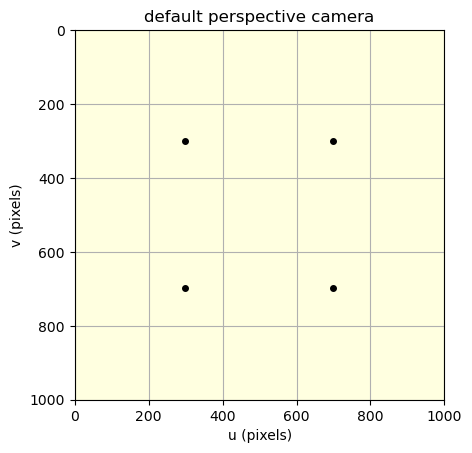

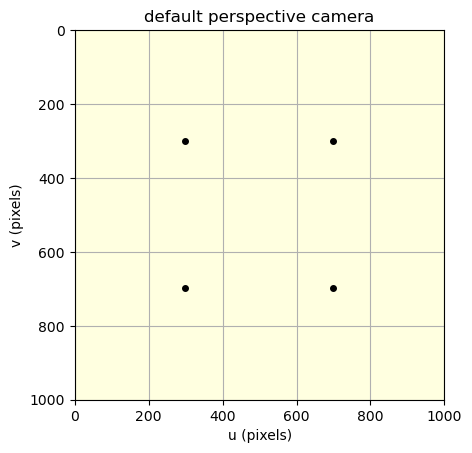

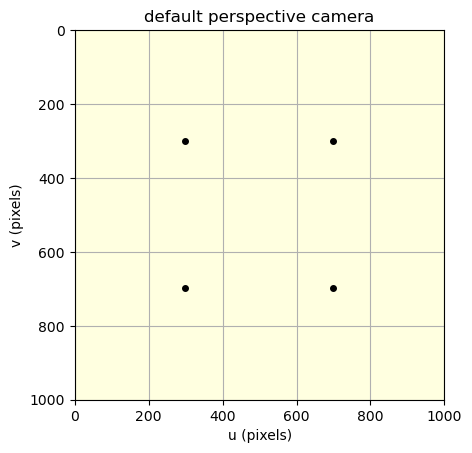

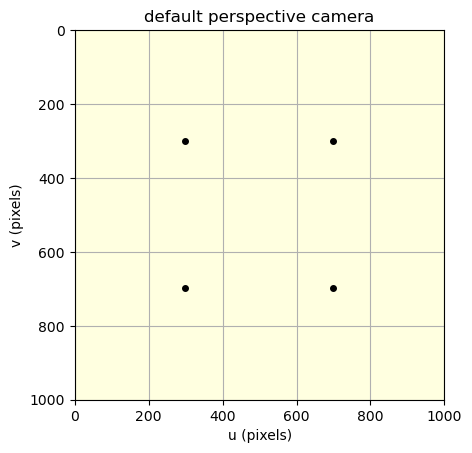

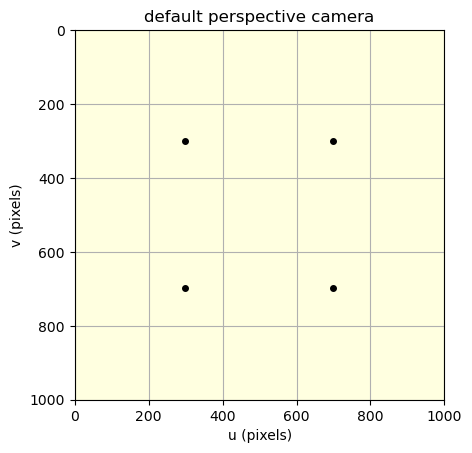

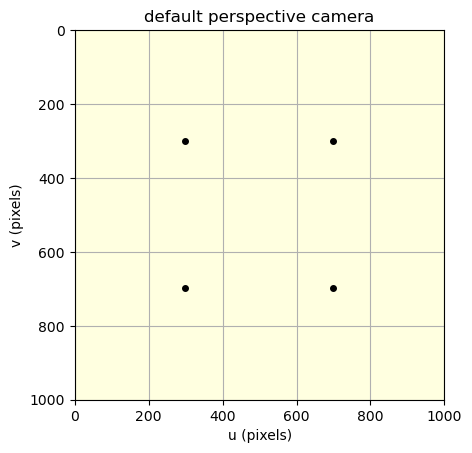

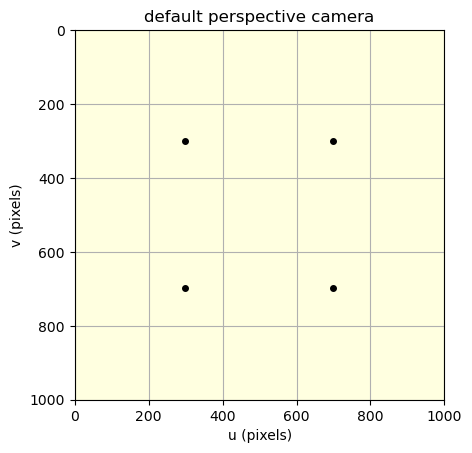

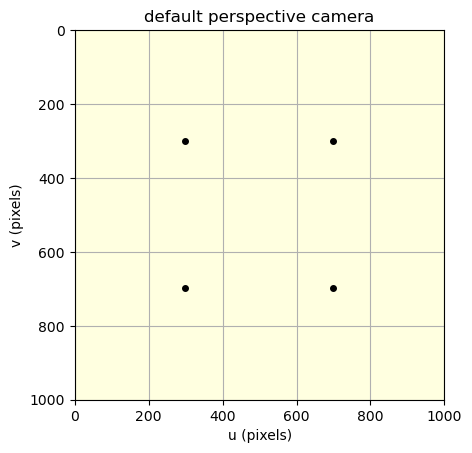

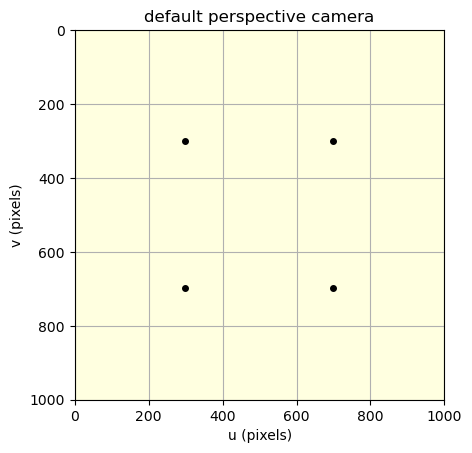

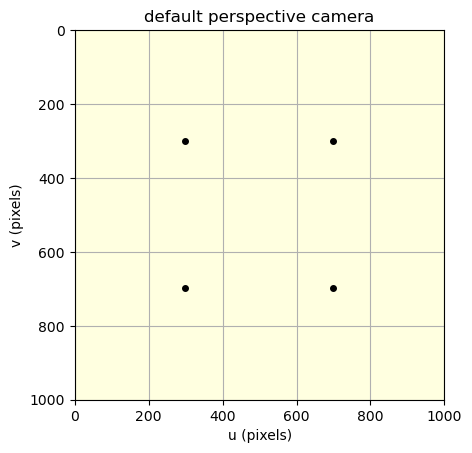

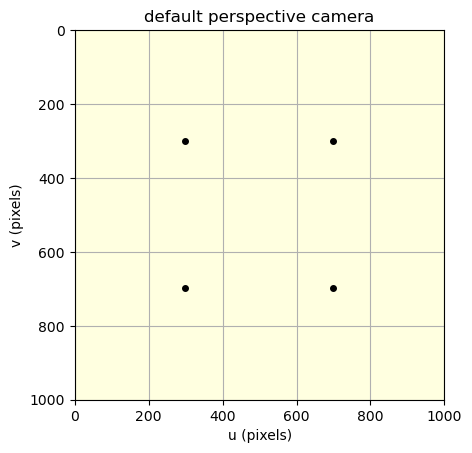

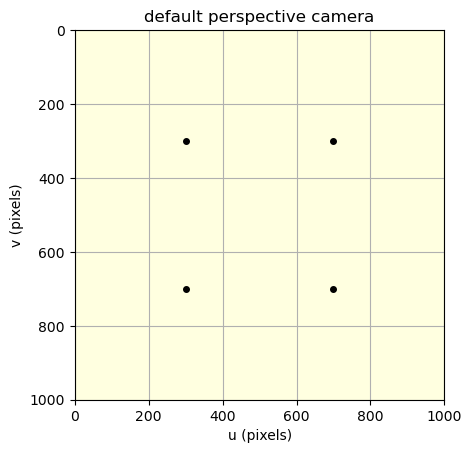

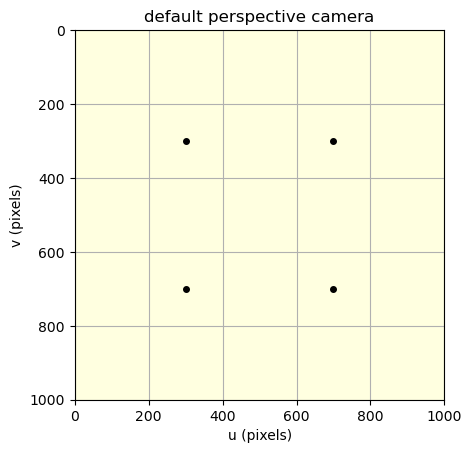

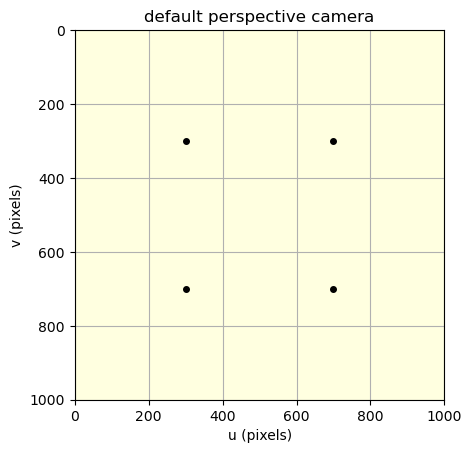

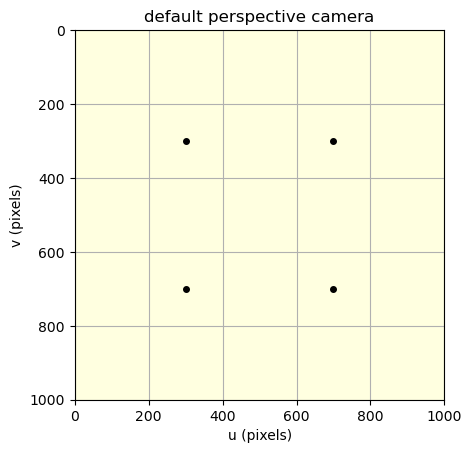

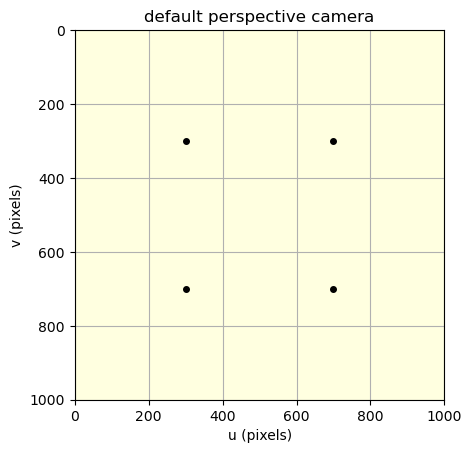

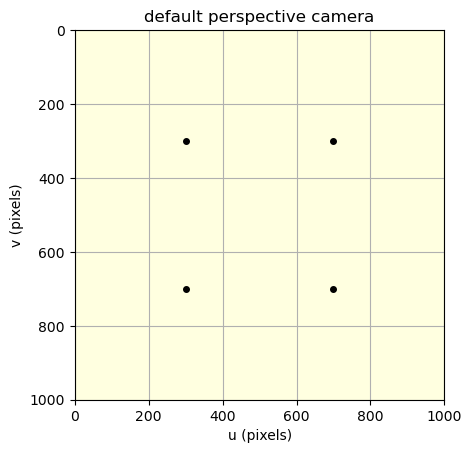

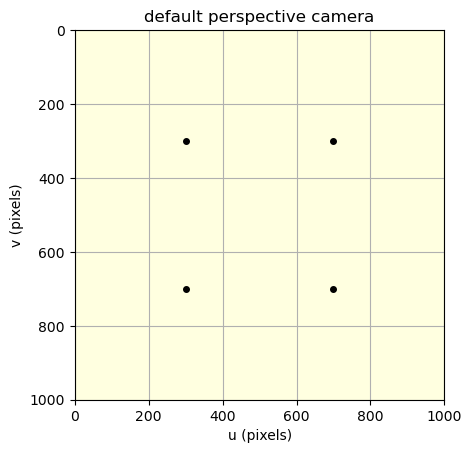

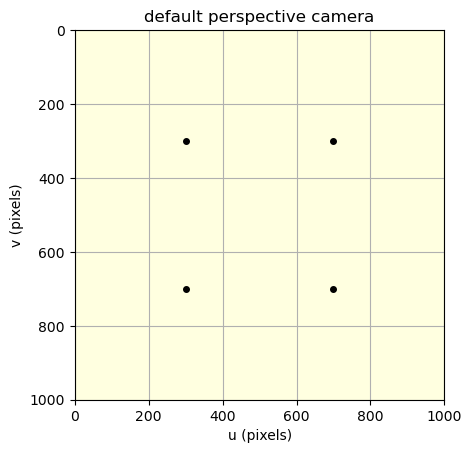

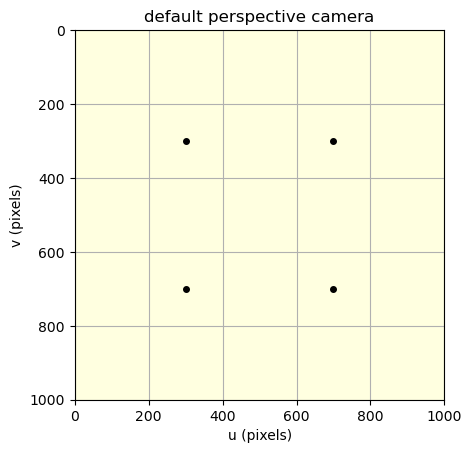

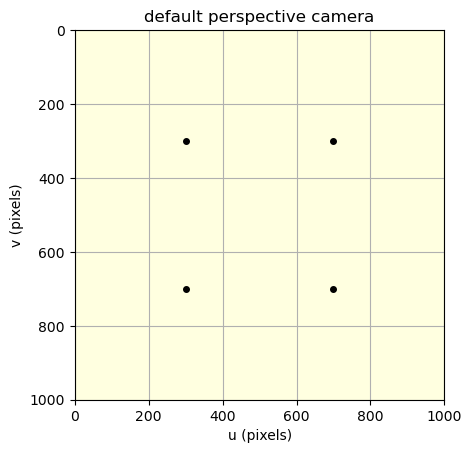

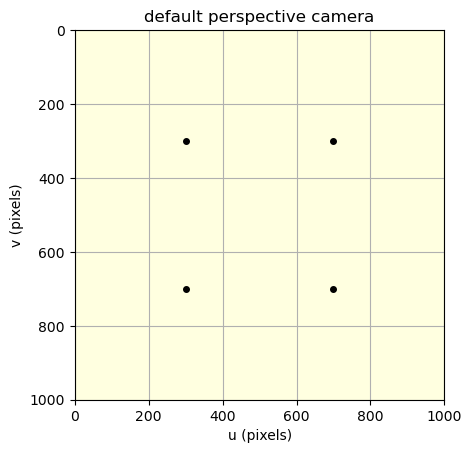

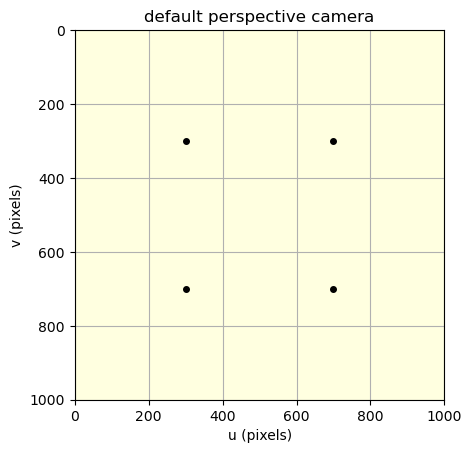

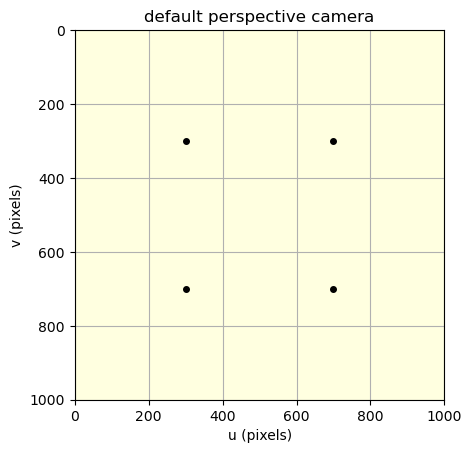

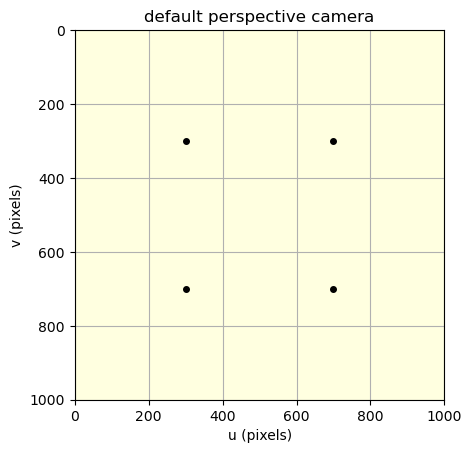

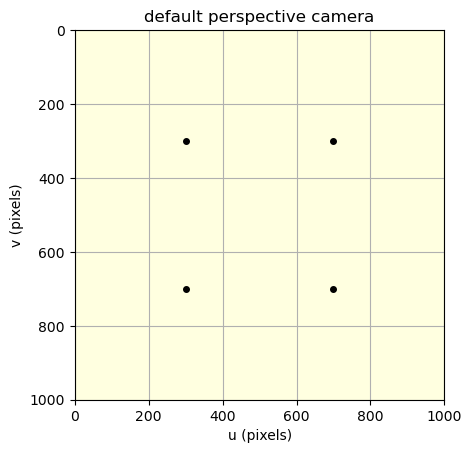

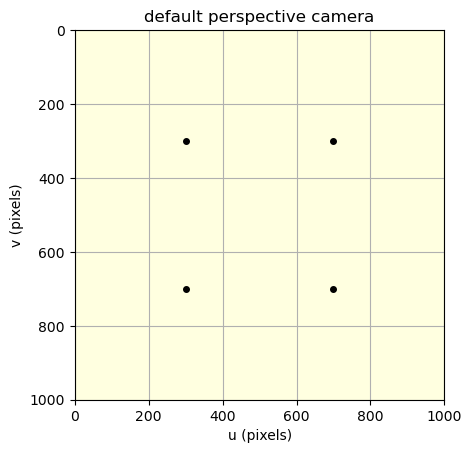

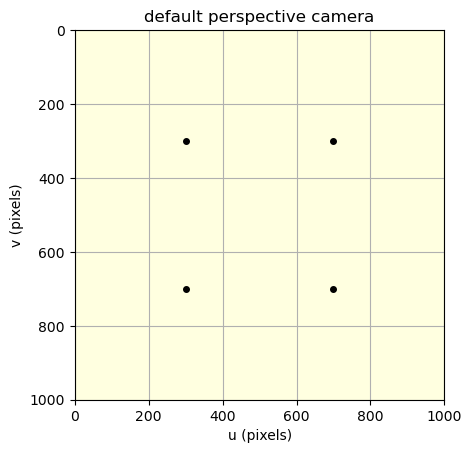

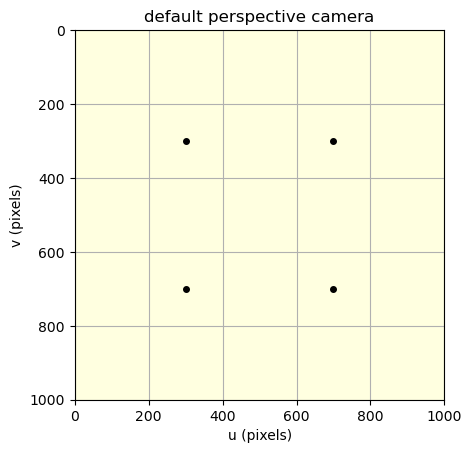

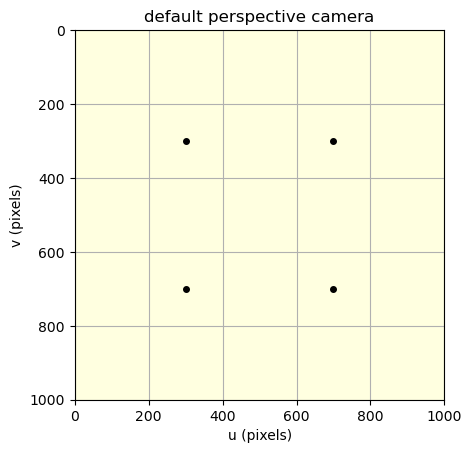

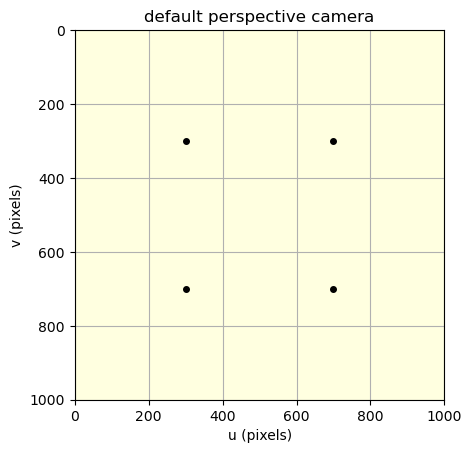

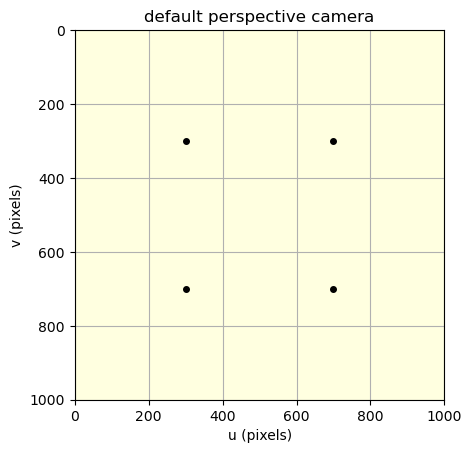

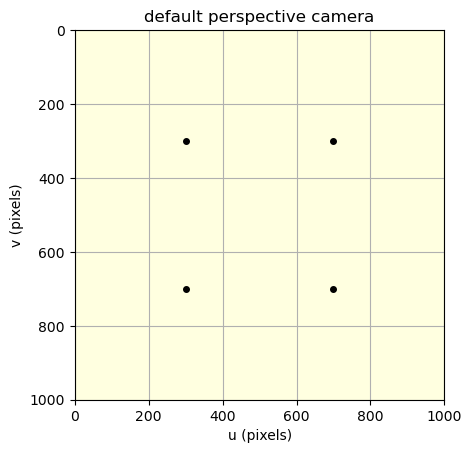

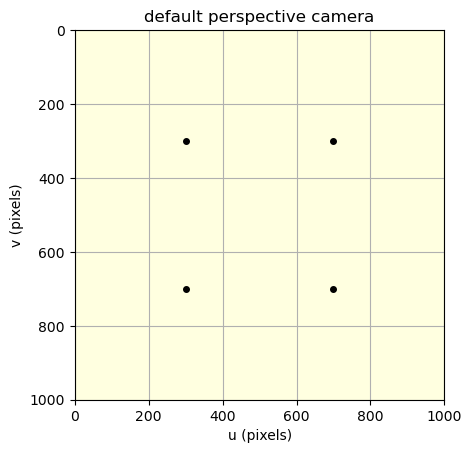

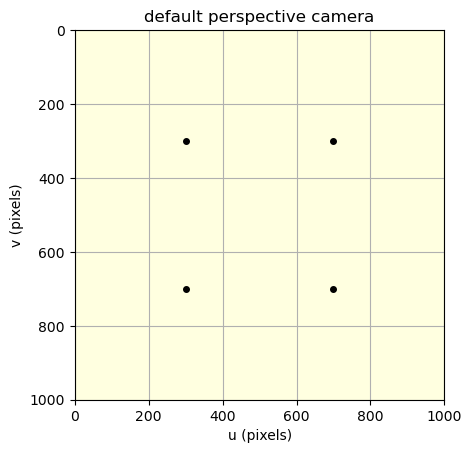

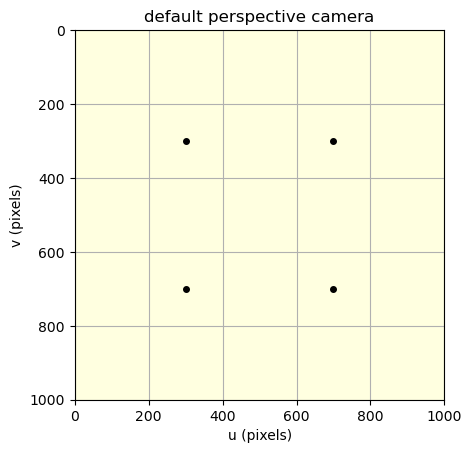

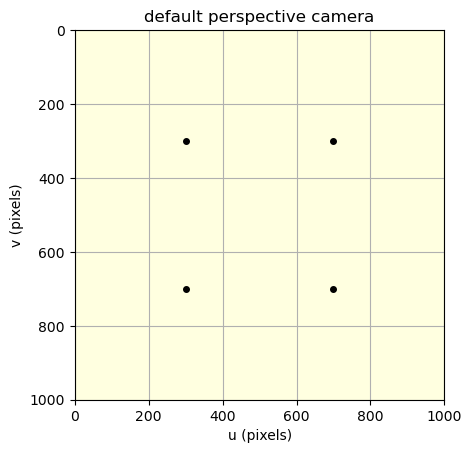

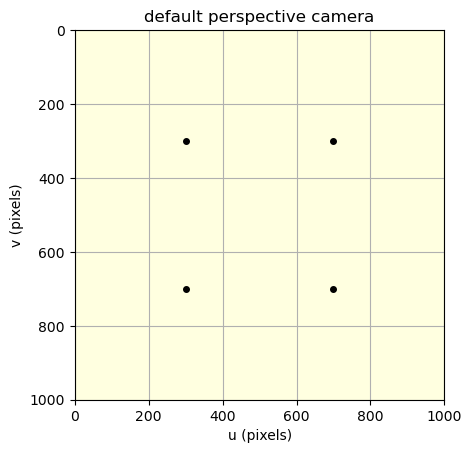

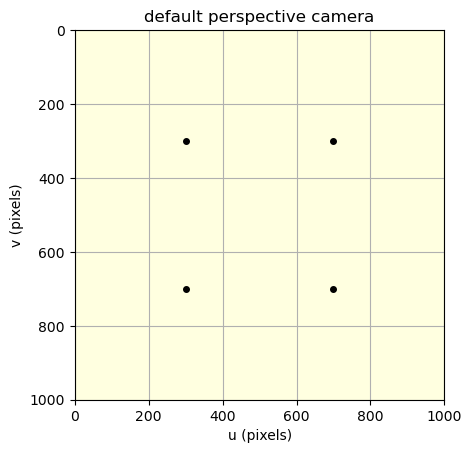

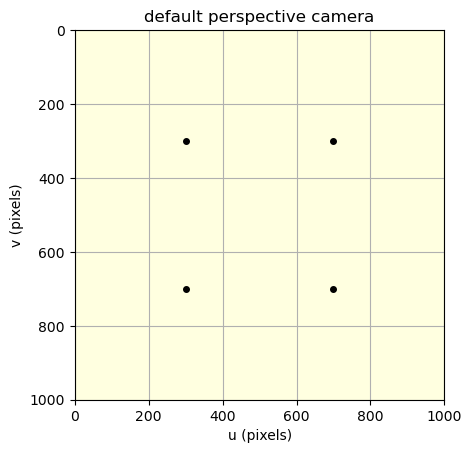

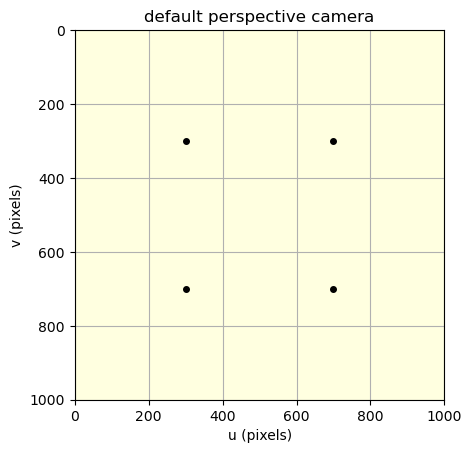

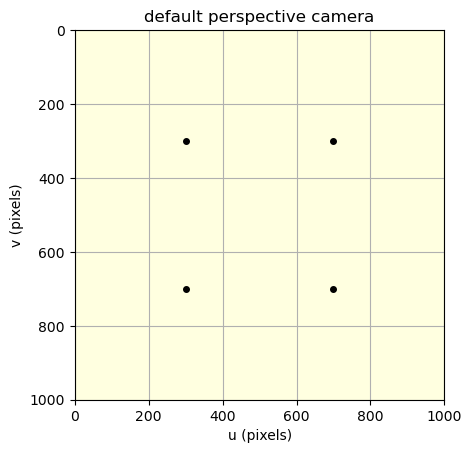

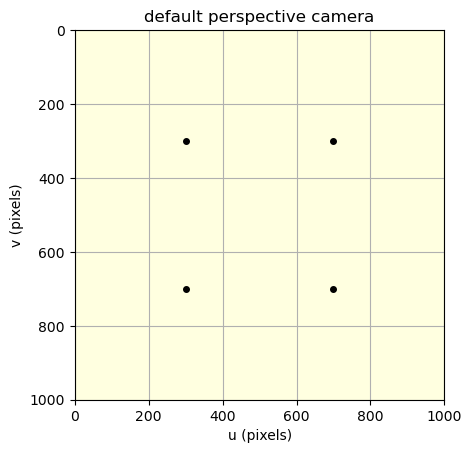

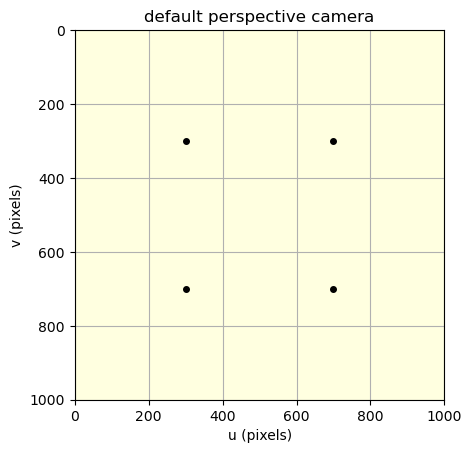

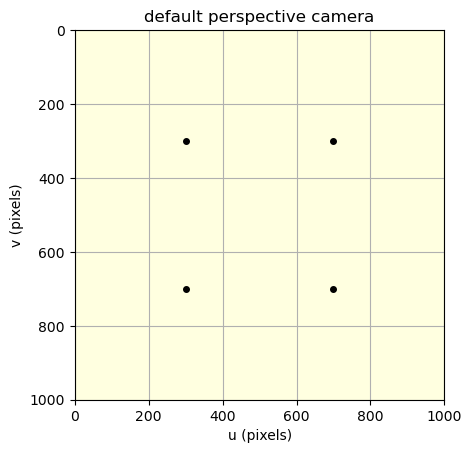

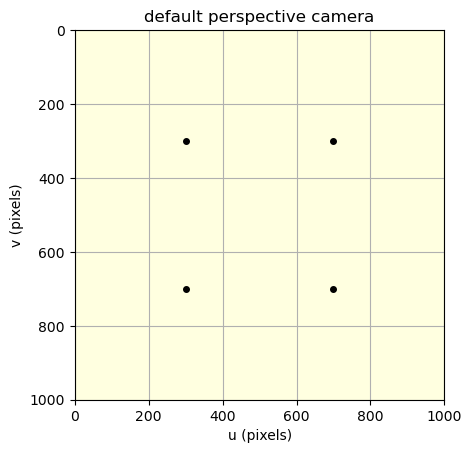

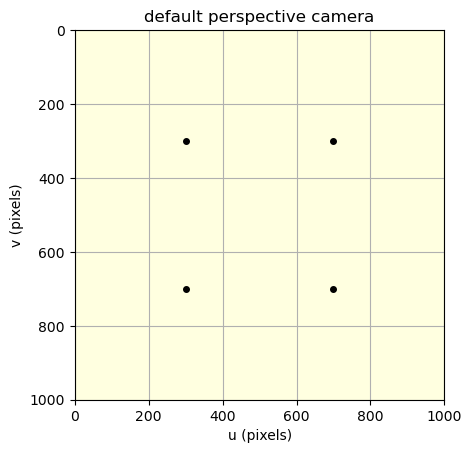

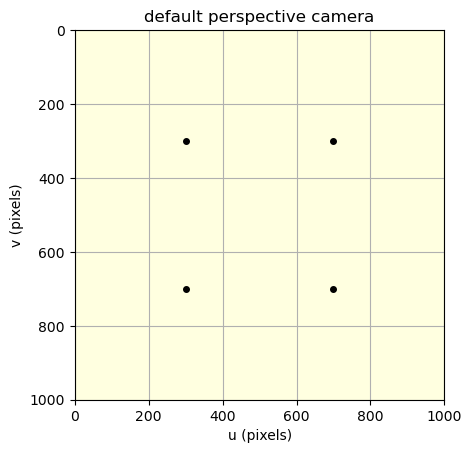

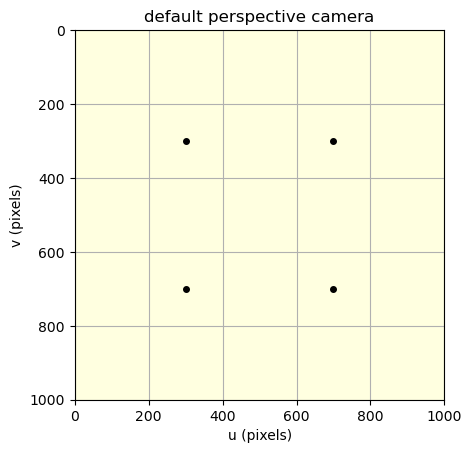

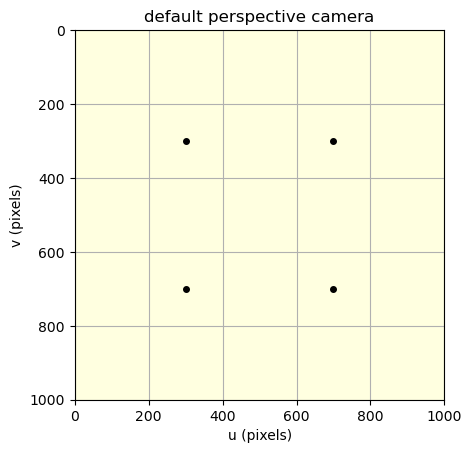

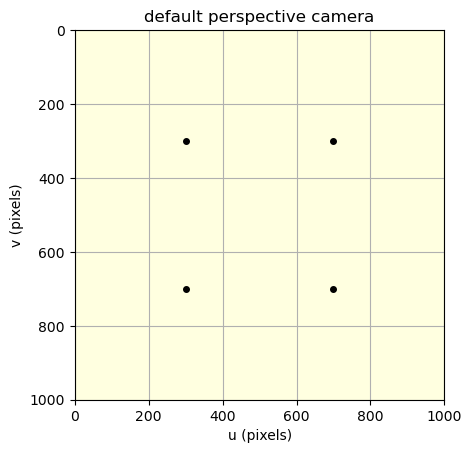

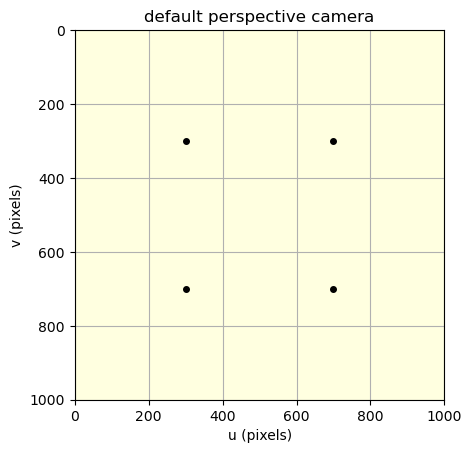

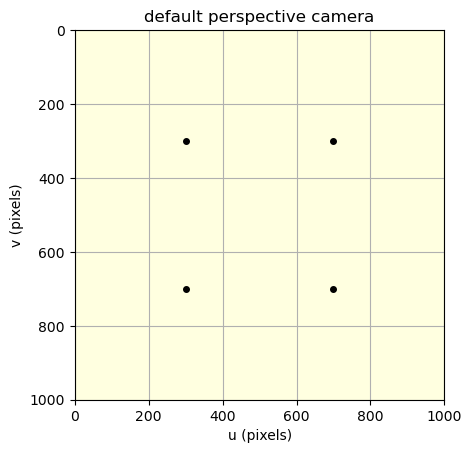

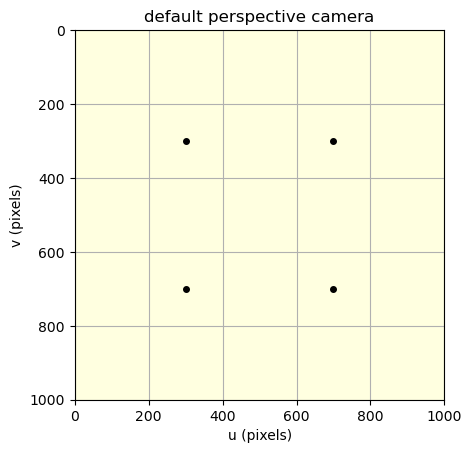

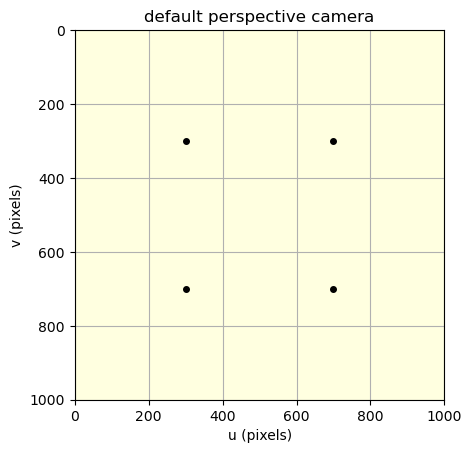

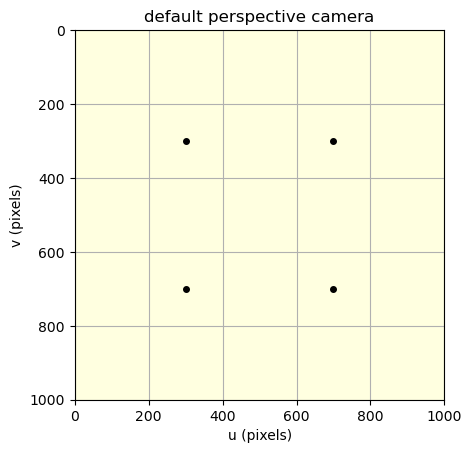

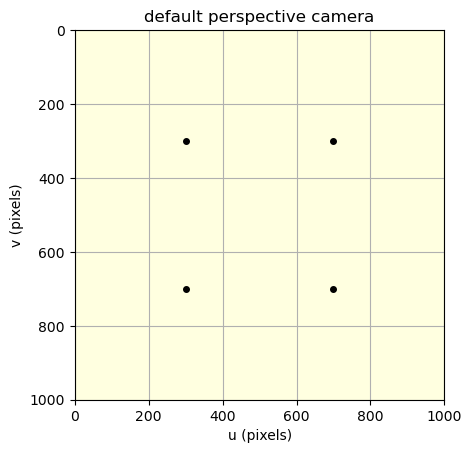

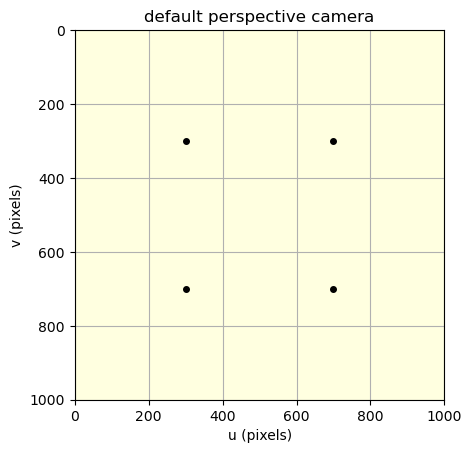

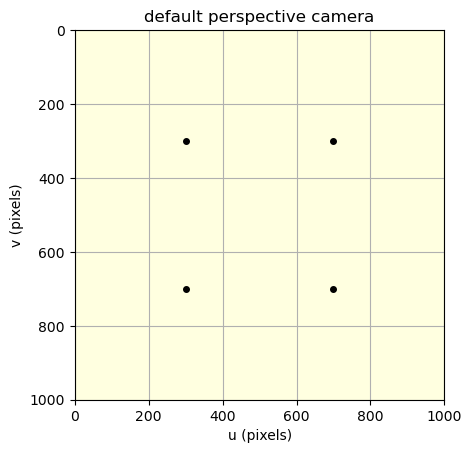

completed on iteration count


In [16]:
pbvs.run(200);

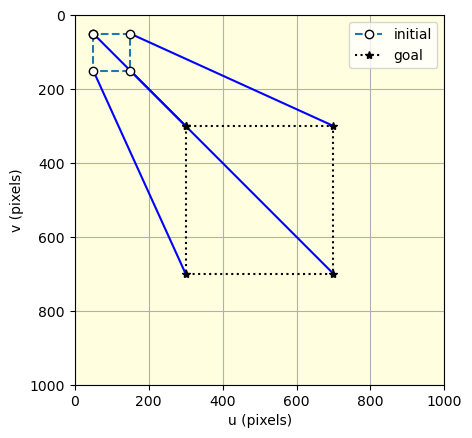

In [17]:
pbvs.plot_p();     # plot image plane trajectory

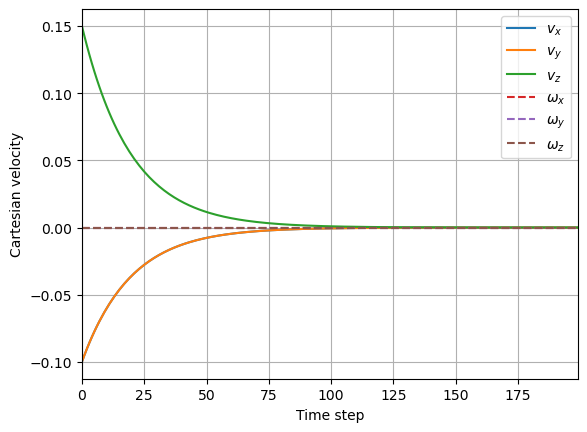

In [18]:
pbvs.plot_vel();   # plot camera velocity

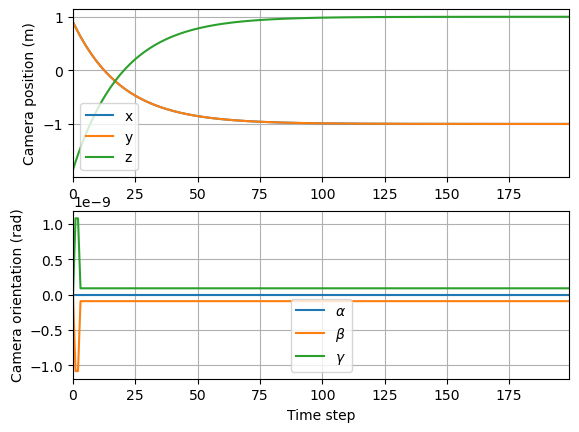

In [19]:
pbvs.plot_pose();  # plot camera trajectoryjanja gambret
